<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/judiciary/CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Data Loading

In [249]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')
df.head()

Total Household Income Region  Total Food Expenditure  \
0                  480332    CAR                  117848   
1                  198235    CAR                   67766   
2                   82785    CAR                   61609   
3                  107589    CAR                   78189   
4                  189322    CAR                   94625   

  Main Source of Income  Agricultural Household indicator  \
0         Wage/Salaries                                 0   
1         Wage/Salaries                                 0   
2         Wage/Salaries                                 1   
3         Wage/Salaries                                 0   
4         Wage/Salaries                                 0   

   Bread and Cereals Expenditure  Total Rice Expenditure  Meat Expenditure  \
0                          42140                   38300             24676   
1                          17329                   13008             17434   
2                          34182                   32001              7783   
3                          34030                   28659             10914   
4                          34820                   30167             18391   

   Total Fish and  marine products Expenditure  Fruit Expenditure  ...  \
0                                        16806               3325  ...   
1                                        11073               2035  ...   
2                                         2590               1730  ...   
3                                        10812                690  ...   
4                                        11309               1395  ...   

   Number of Refrigerator/Freezer  Number of Washing Machine  \
0                               1                          1   
1                               0                          1   
2                               0                          0   
3                               0                          0   
4                               1                          0   

   Number of Airconditioner  Number of Car, Jeep, Van  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Number of Landline/wireless telephones  Number of Cellular phone  \
0                                       0                         2   
1                                       0                         3   
2                                       0                         0   
3                                       0                         1   
4                                       0                         3   

   Number of Personal Computer  Number of Stove with Oven/Gas Range  \
0                            1                                    0   
1                            1                                    0   
2                            0                                    0   
3                            0                                    0   
4                            0                                    0   

   Number of Motorized Banca  Number of Motorcycle/Tricycle  
0                          0                              1  
1                          0                              2  
2                          0                              0  
3                          0                              0  
4                          0                              1  

[5 rows x 60 columns]

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [251]:
df.isna().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure                          0
Communication Expenditure                           0
Education Expenditure                               0
Miscellaneous Goods and Services Expenditure        0
Special Occasions Expenditure                       0
Crop Farming and Gardening expenses                 0
Total Income from Entrepreneurial Acitivites        0
Household Head Sex                                  0
Household Head Age                                  0
Household Head Marital Status                       0
Household Head Highest Grade Completed              0
Household Head Job or Business Indicator            0
Household Head Occupation                        7536
Household Head Class of Worker                   7536
Type of Household                                   0
Total Number of Family members                      0
Members with age less than 5 year old               0
Members with age 5 - 17 years old                   0
Total number of family members employed             0
Type of Building/House                              0
Type of Roof                                        0
Type of Walls                                       0
House Floor Area                                    0
House Age                                           0
Number of bedrooms                                  0
Tenure Status                                       0
Toilet Facilities                                1580
Electricity                                         0
Main Source of Water Supply                         0
Number of Television                                0
Number of CD/VCD/DVD                                0
Number of Component/Stereo set                      0
Number of Refrigerator/Freezer                      0
Number of Washing Machine                           0
Number of Airconditioner                            0
Number of Car, Jeep, Van                            0
Number of Landline/wireless telephones              0
Number of Cellular phone                            0
Number of Personal Computer                         0
Number of Stove with Oven/Gas Range                 0
Number of Motorized Banca                           0
Number of Motorcycle/Tricycle                       0
dtype: int64

In [252]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [253]:
df['Region'].value_counts()

Region
IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: count, dtype: int64

In [254]:
# Extract Numerical and Categorical Columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

expenditure_columns = df.filter(like='Expenditure').columns
income_columns = df.filter(like='Income').columns

In [255]:
# Remove Agricultural Household indicator from numerical_columns
numerical_columns = np.delete(numerical_columns, np.where(numerical_columns == 'Agricultural Household indicator'))

In [256]:
# Include Crop Farming and Gardening expenses in expenditure_columns
expenditure_columns = np.append(expenditure_columns, 'Crop Farming and Gardening expenses')

In [257]:
# Remove 'Main Source of Income' from income_columns
income_columns = np.delete(income_columns, np.where(income_columns == 'Main Source of Income'))

In [258]:
# Count number of columns for both numerical and categorical
num_cols = len(numerical_columns)
cat_cols = len(categorical_columns)

print(f"Number of numerical columns: {num_cols}")
print(f"Number of categorical columns: {cat_cols}")

Number of numerical columns: 44
Number of categorical columns: 15


In [259]:
# Count Expenditure Columns and Income Columns
exp_cols = len(expenditure_columns)
inc_cols = len(income_columns)

print(f"Number of expenditure columns: {exp_cols}")
print(f"Number of income columns: {inc_cols}")

Number of expenditure columns: 19
Number of income columns: 2


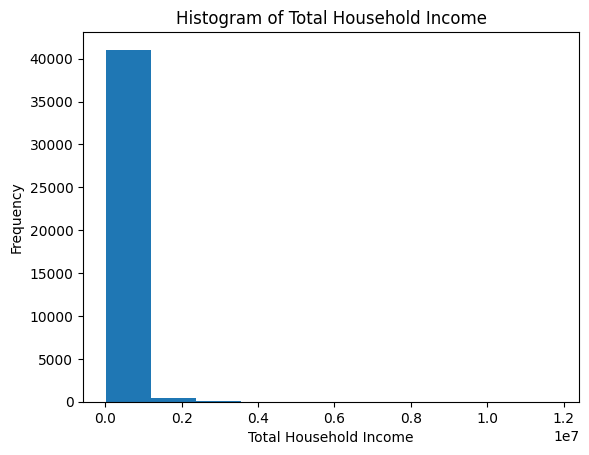

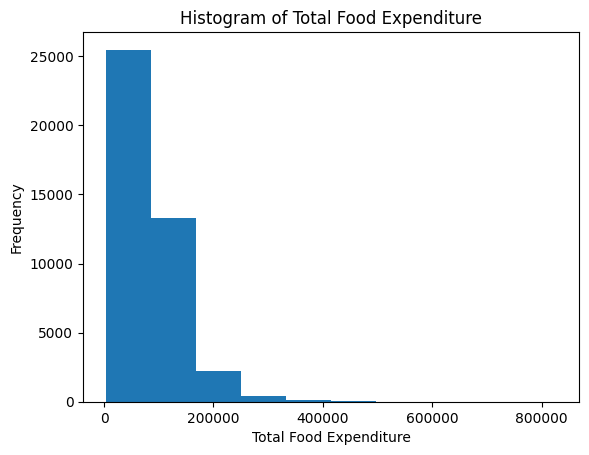

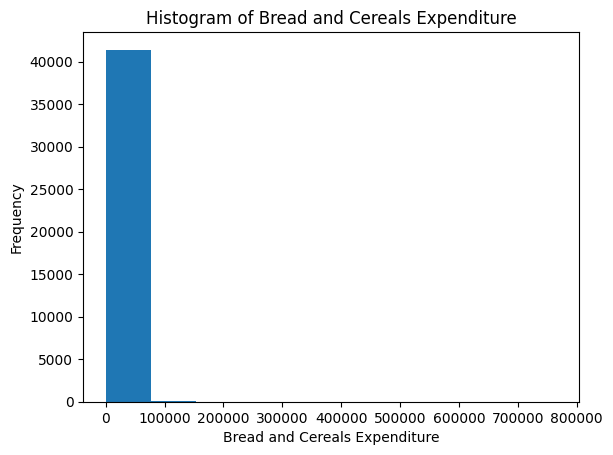

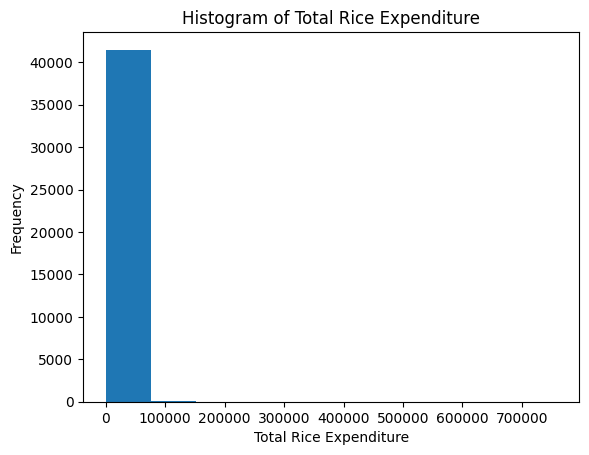

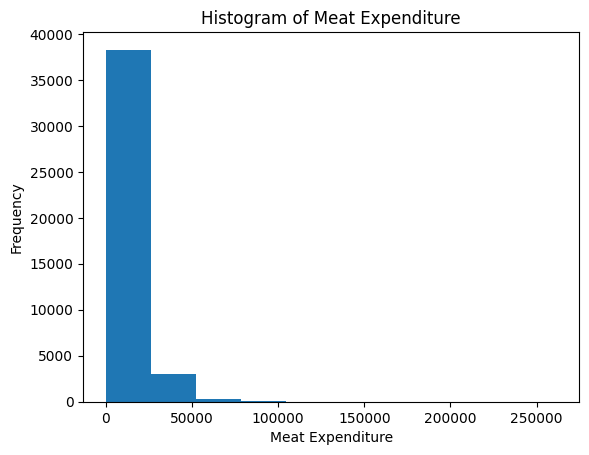

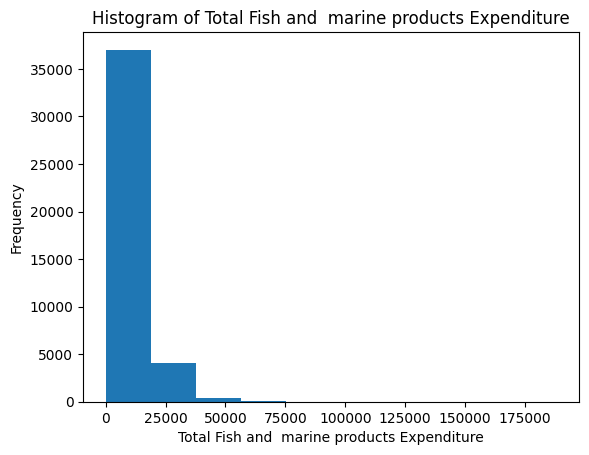

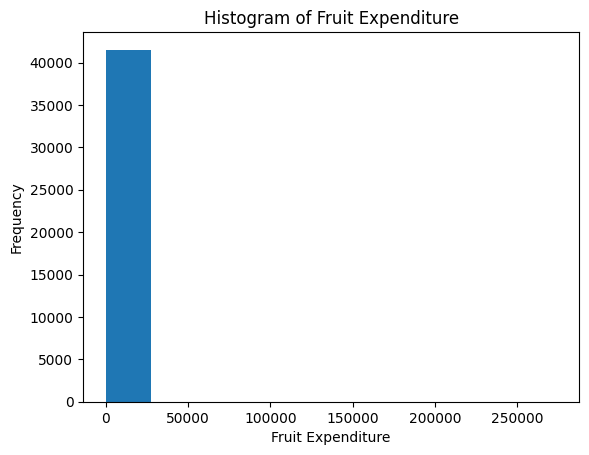

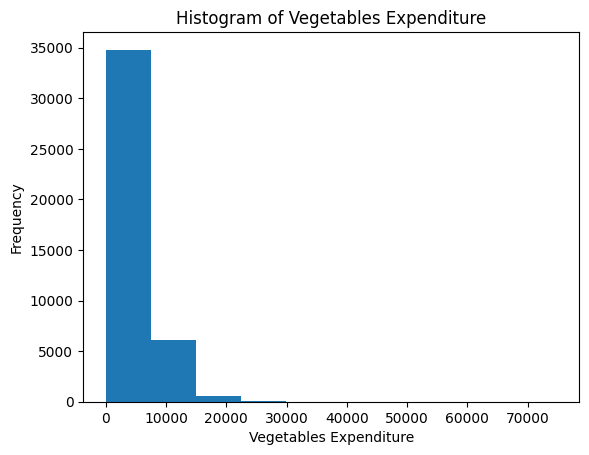

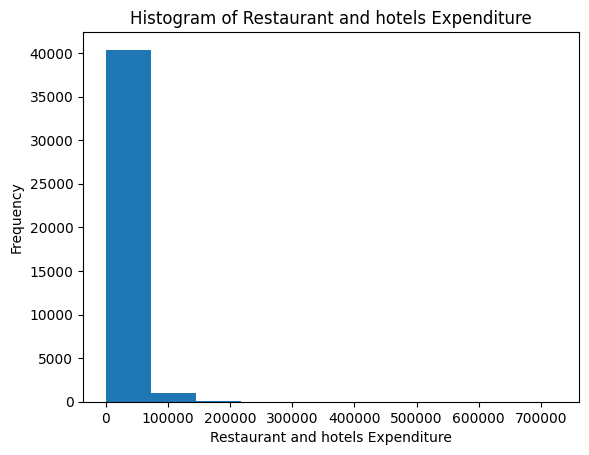

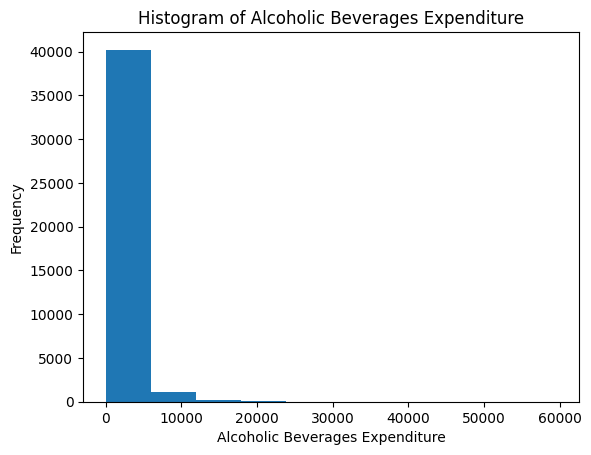

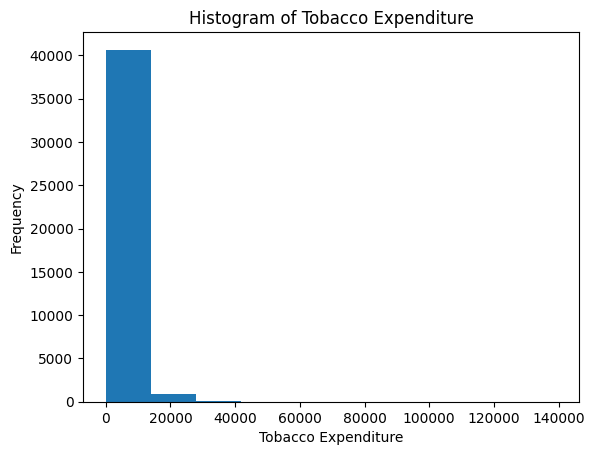

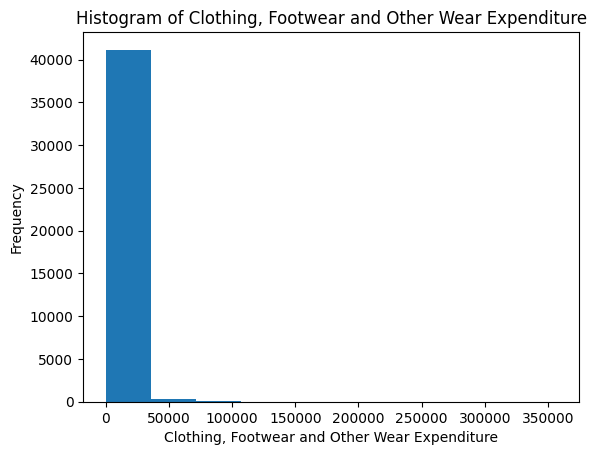

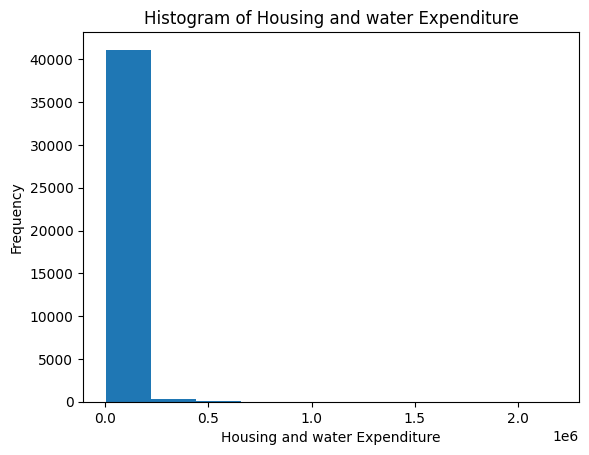

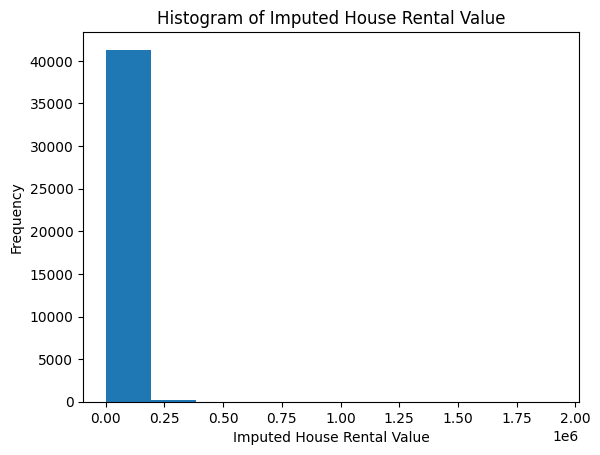

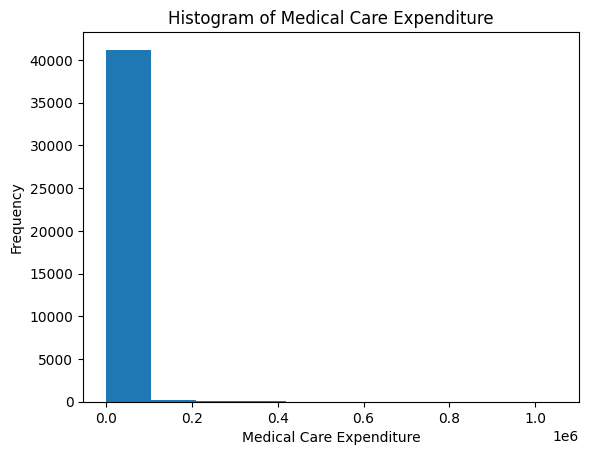

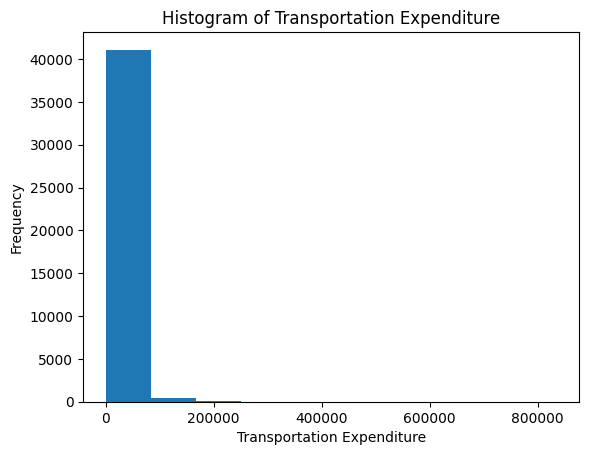

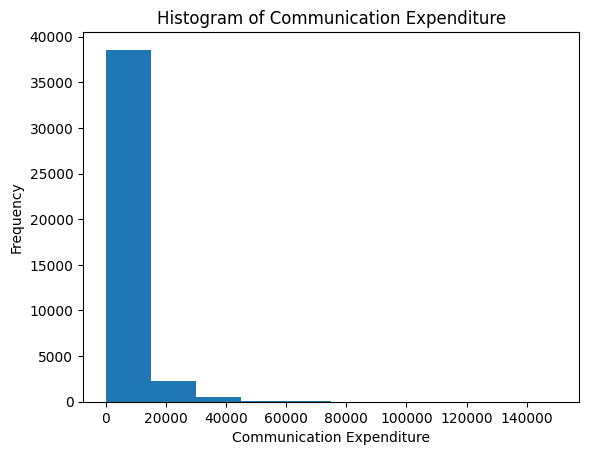

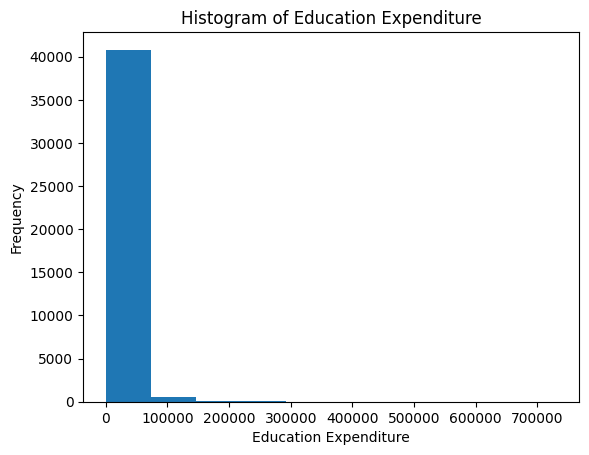

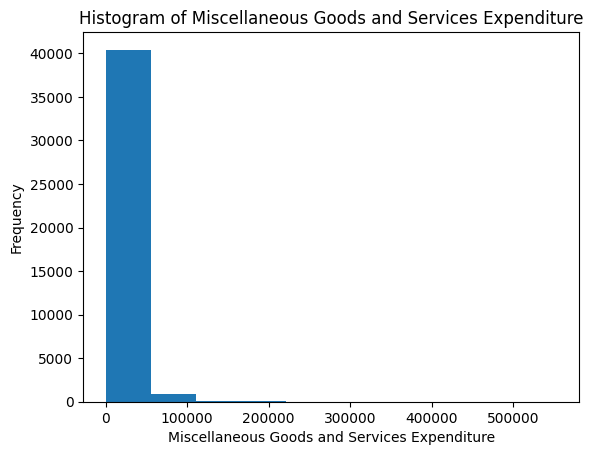

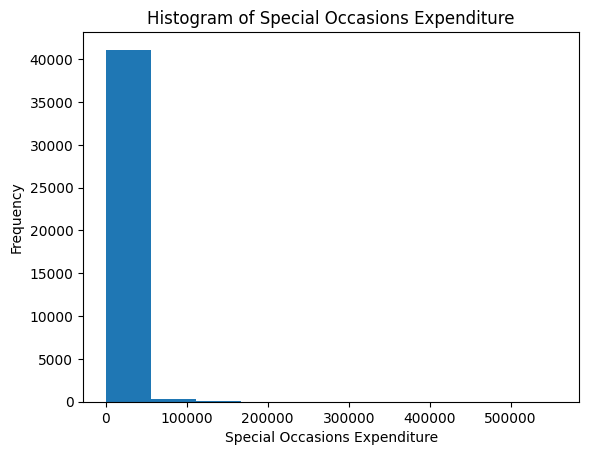

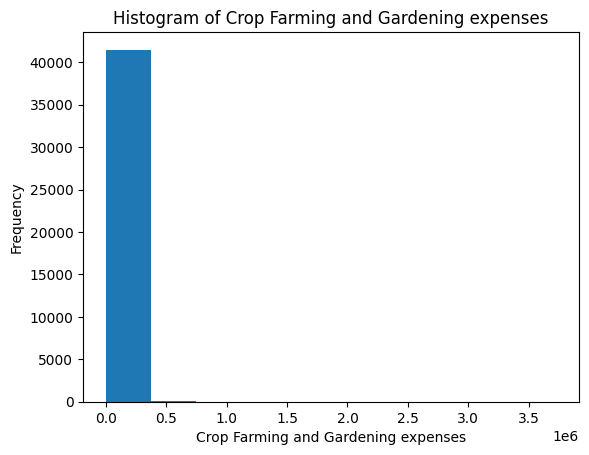

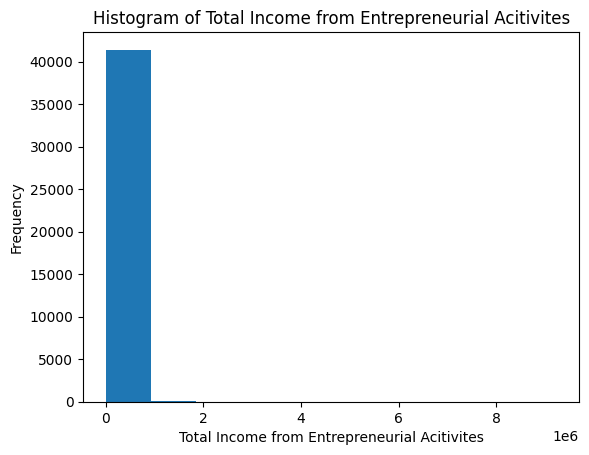

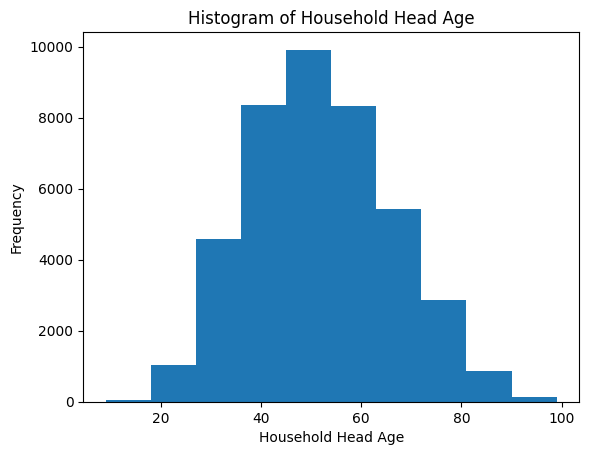

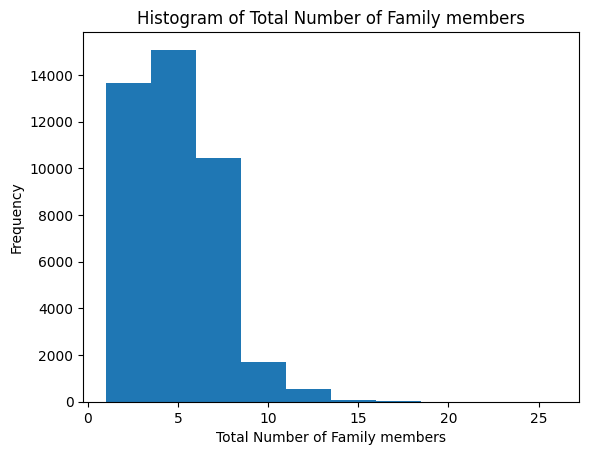

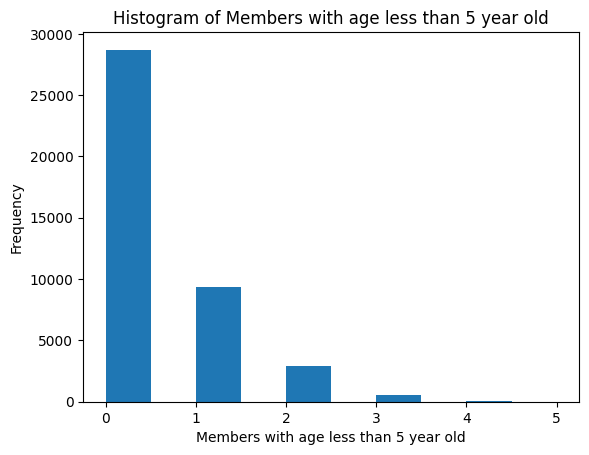

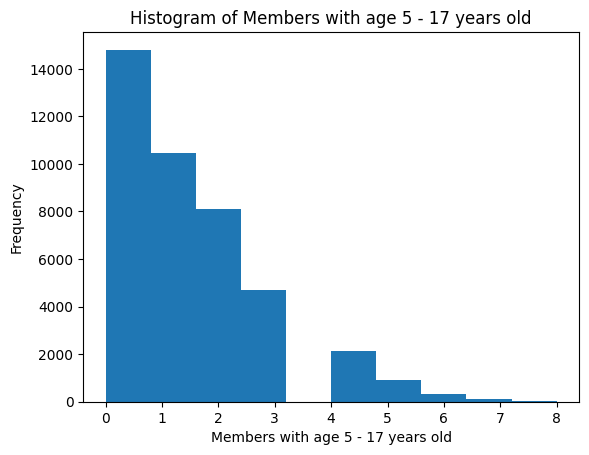

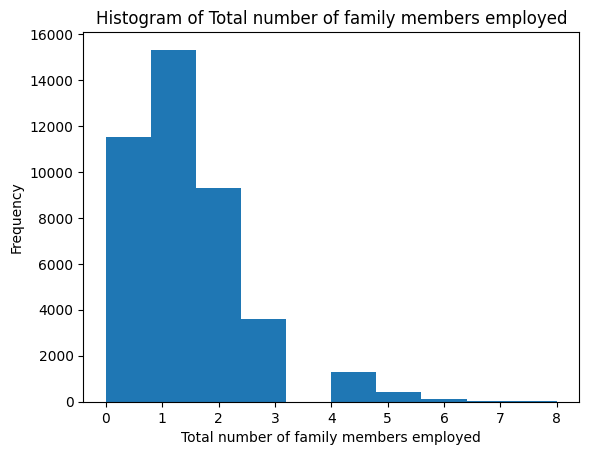

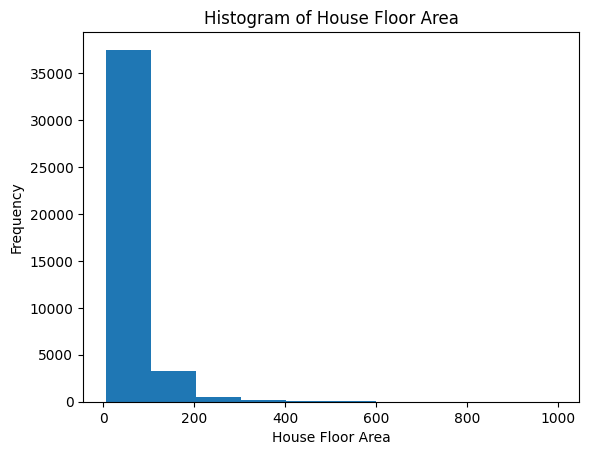

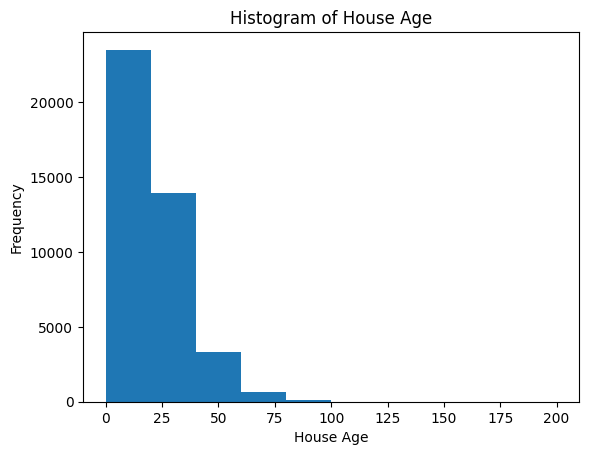

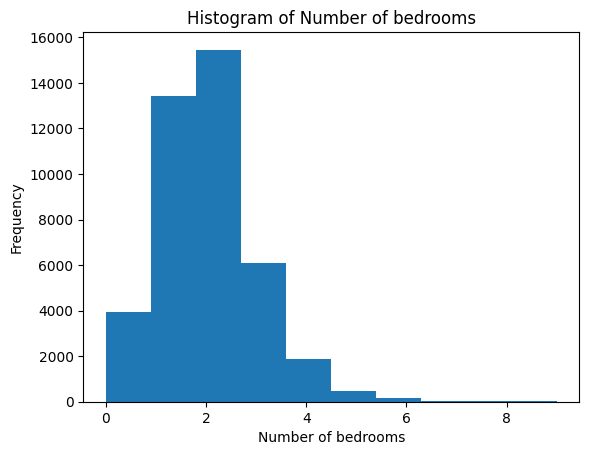

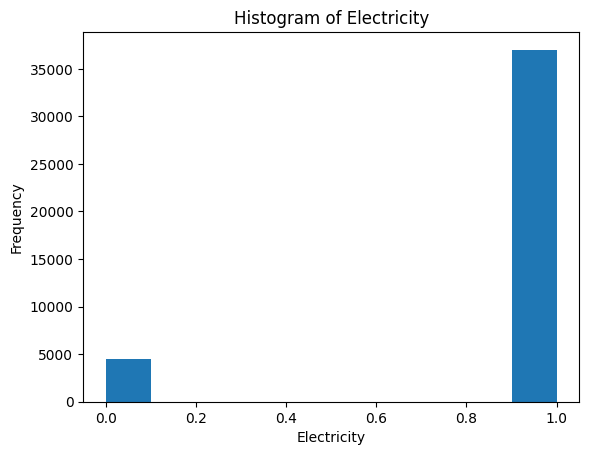

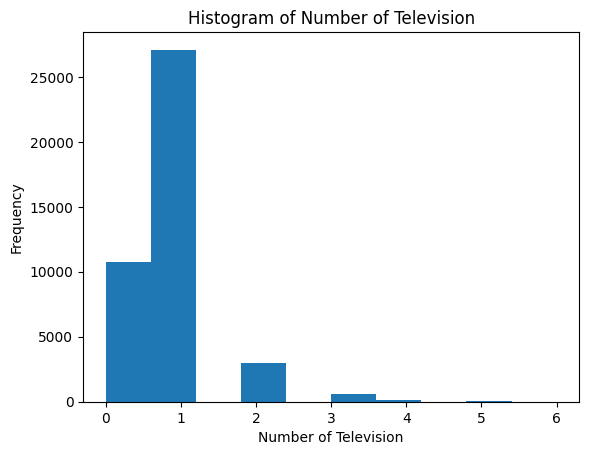

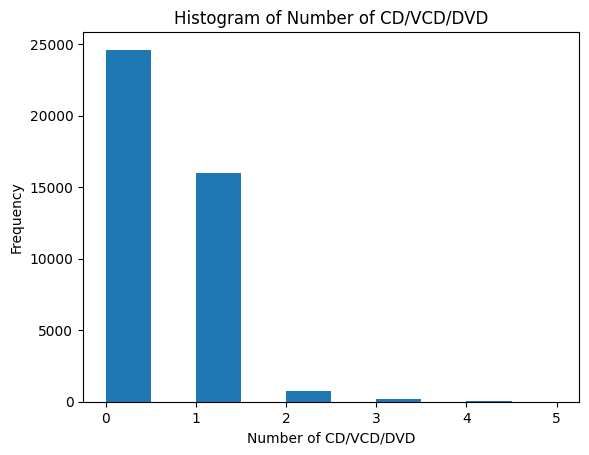

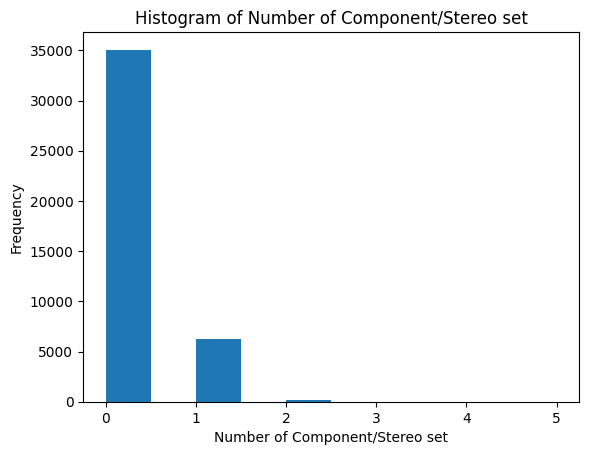

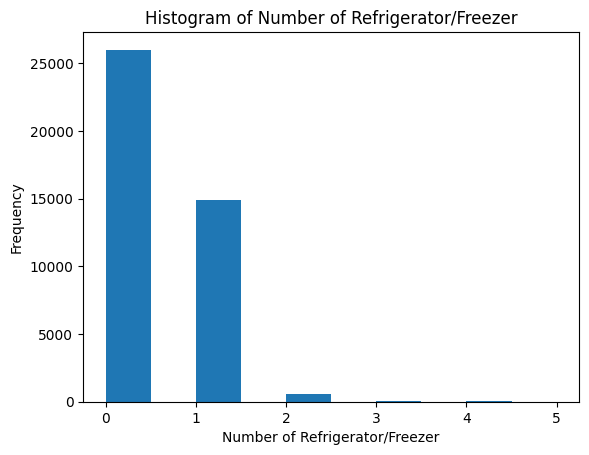

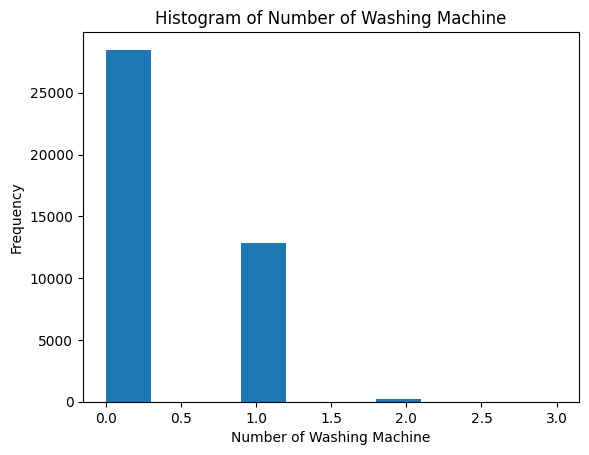

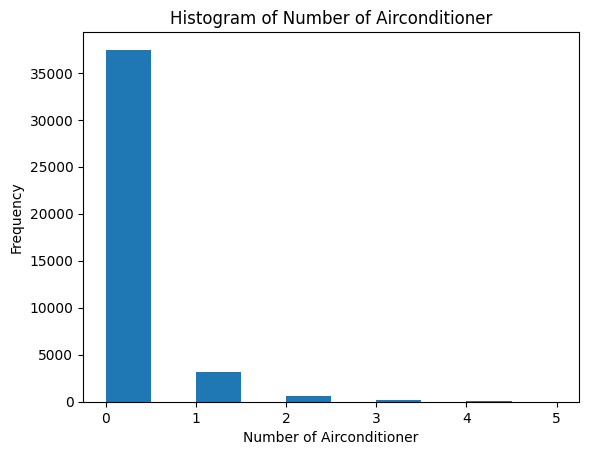

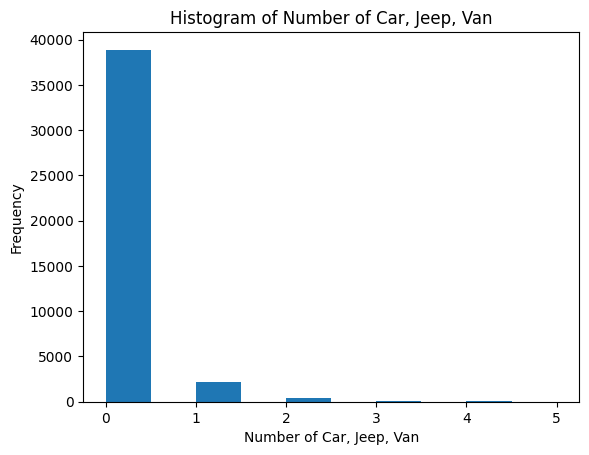

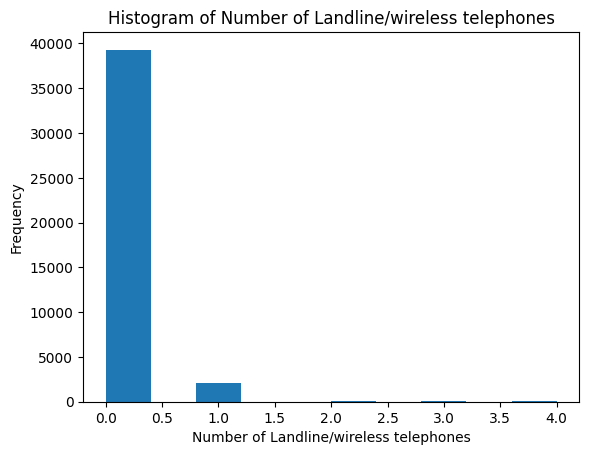

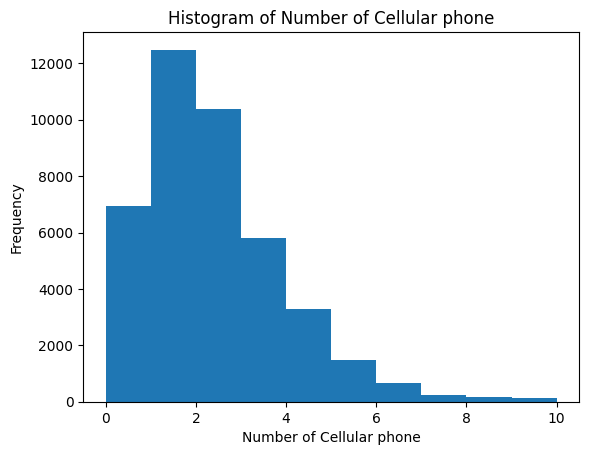

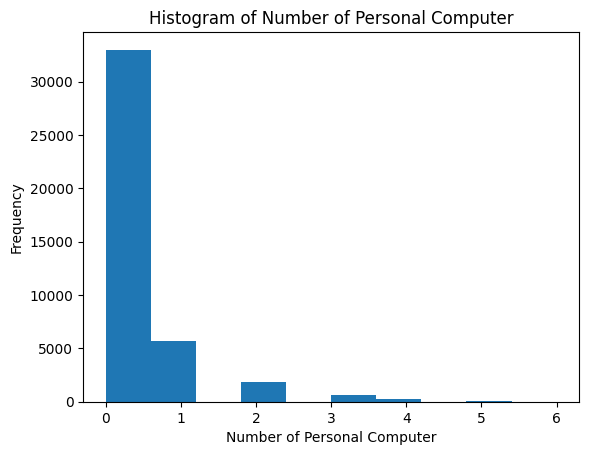

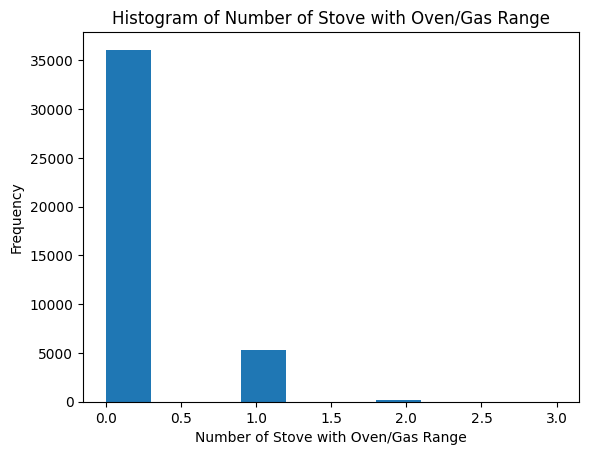

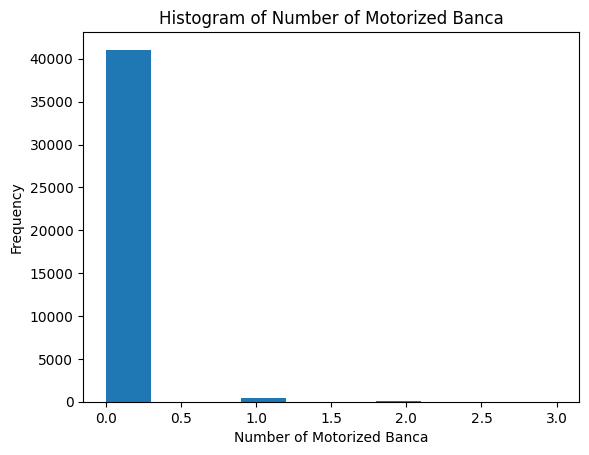

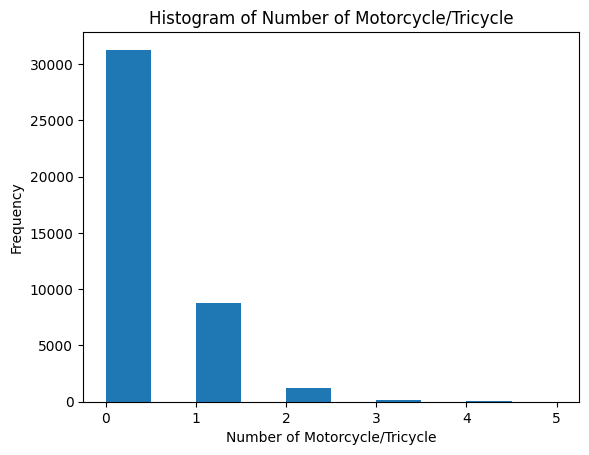

In [260]:
# Histogram for all Numerical Columns, individually
for col in numerical_columns:
    plt.hist(df[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

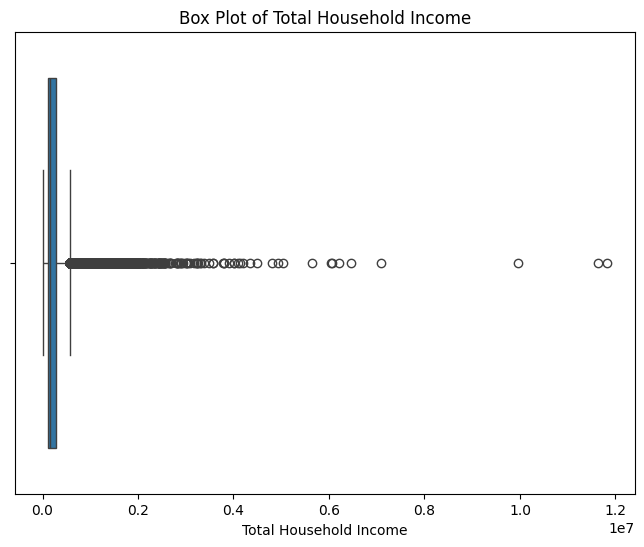

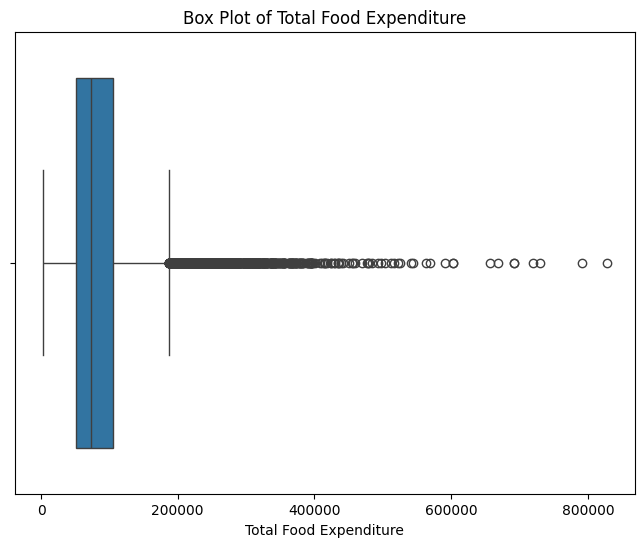

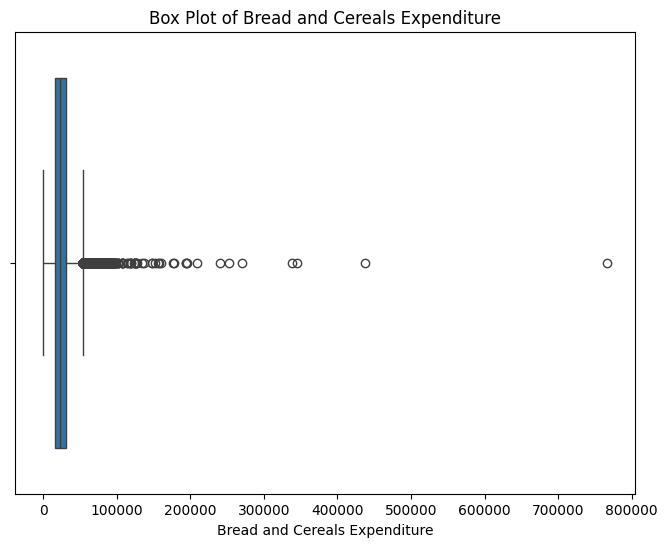

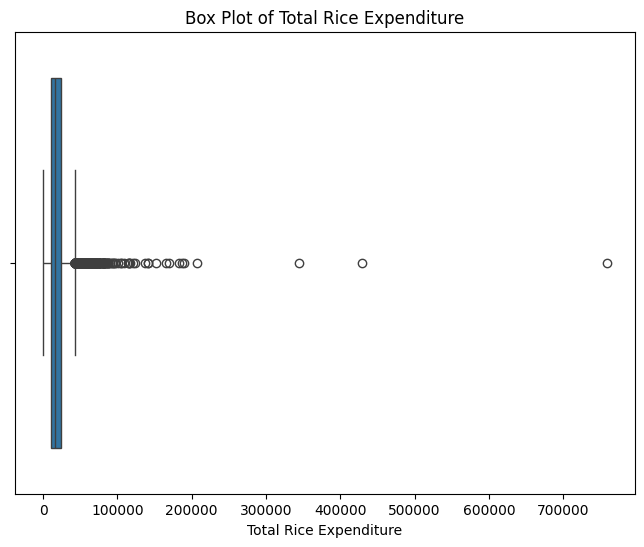

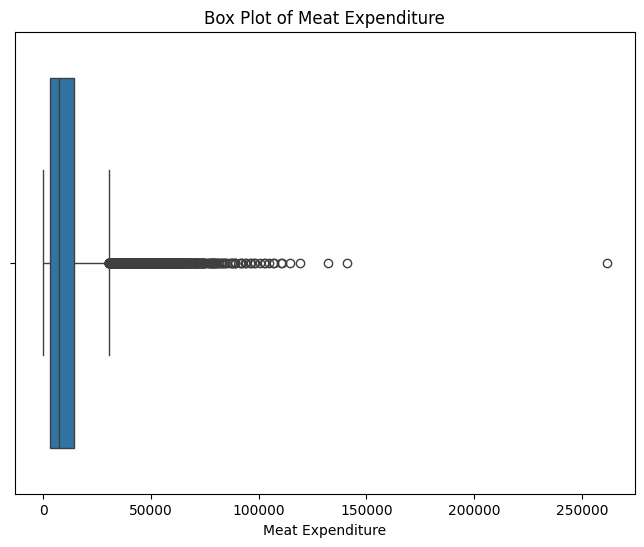

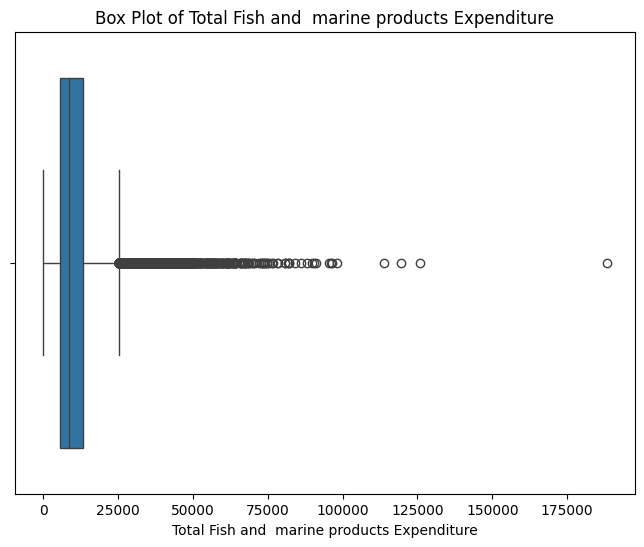

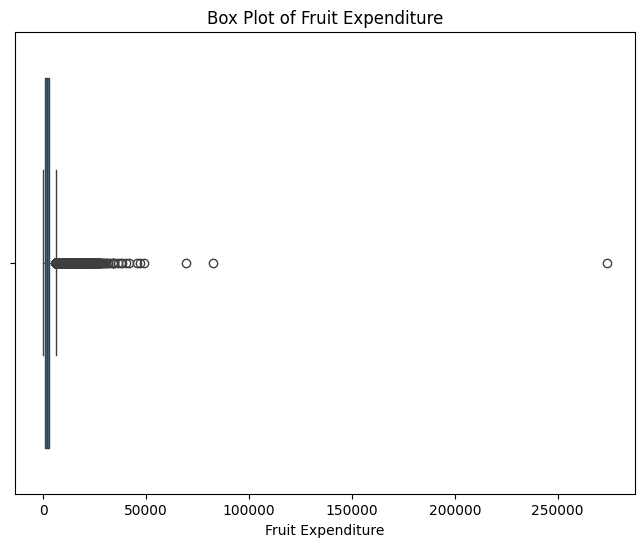

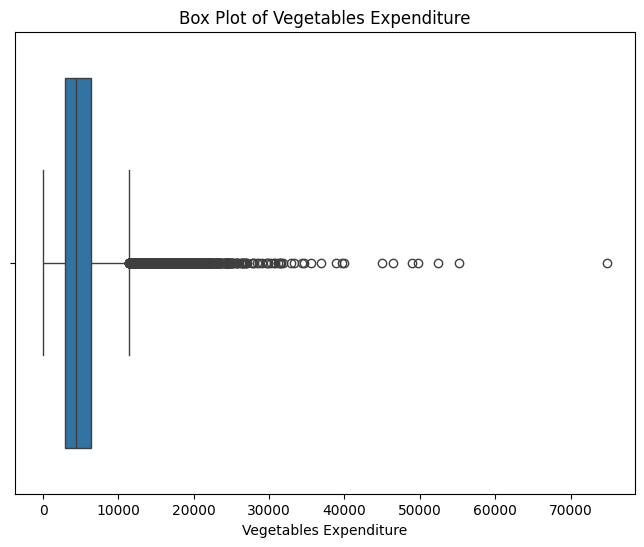

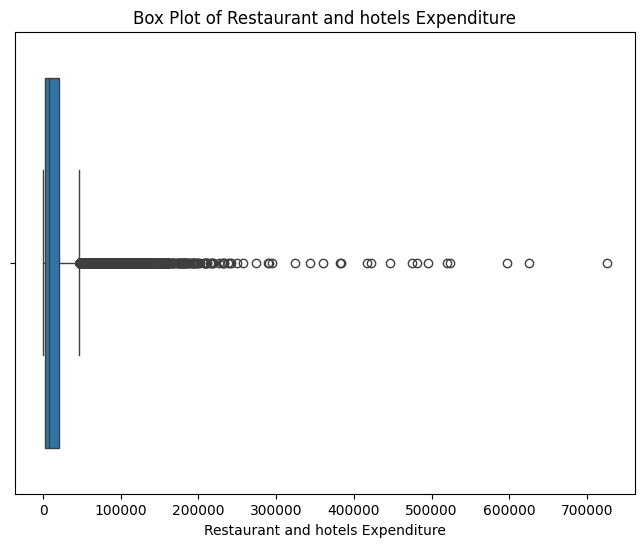

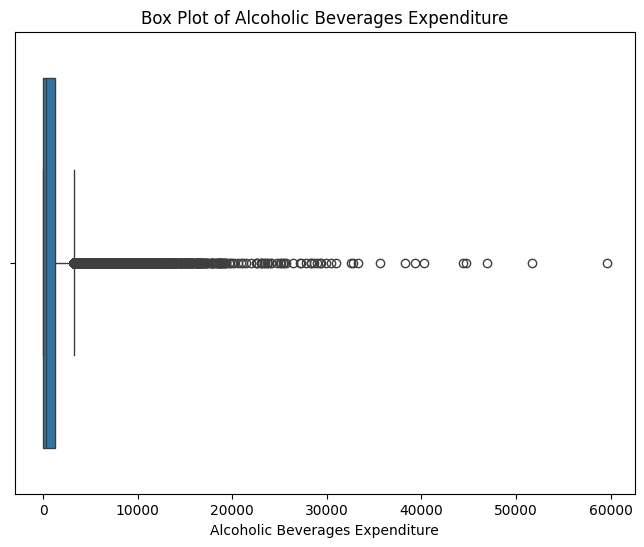

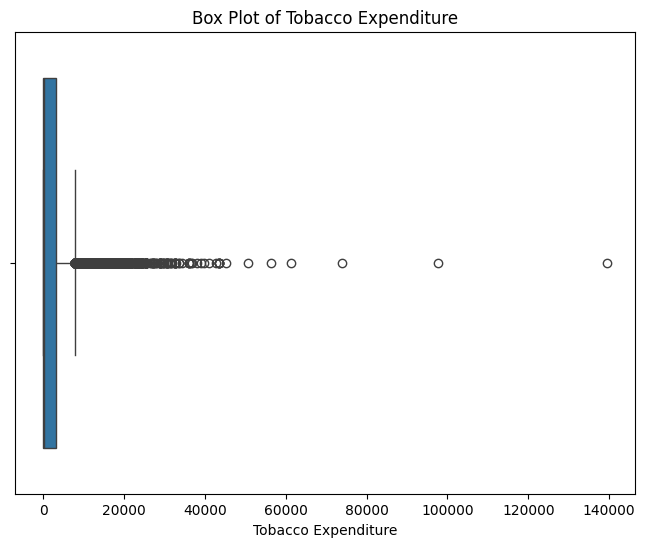

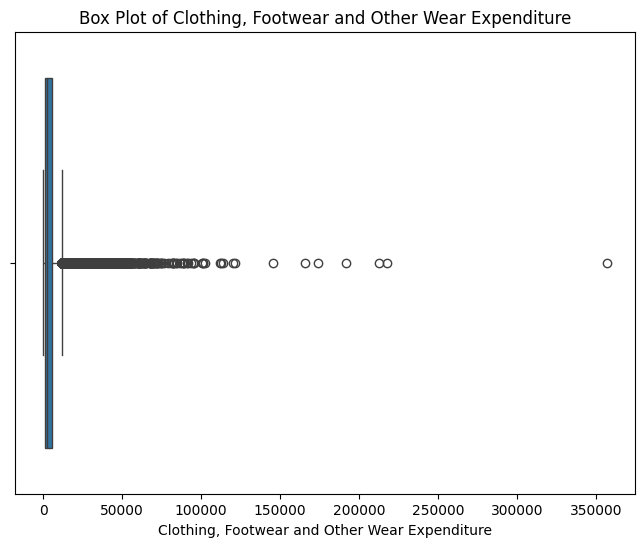

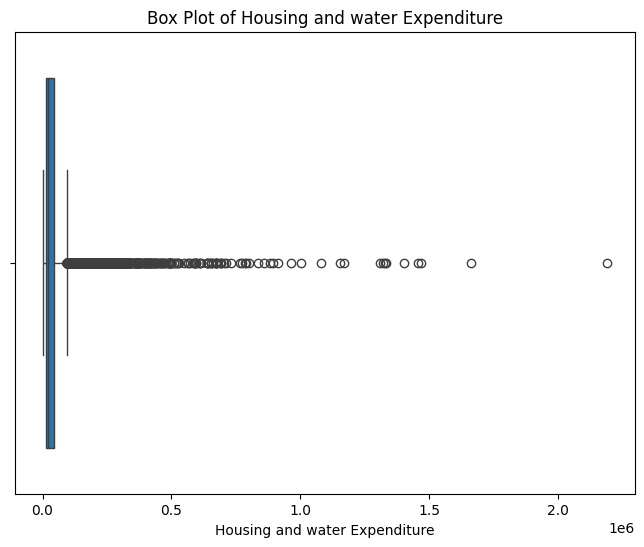

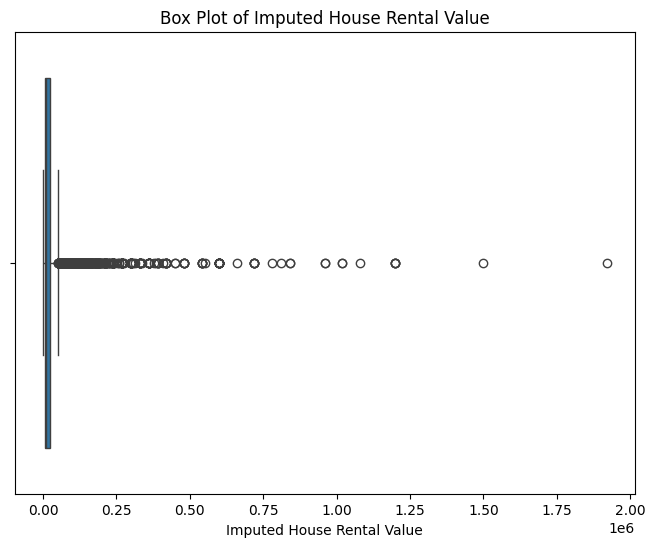

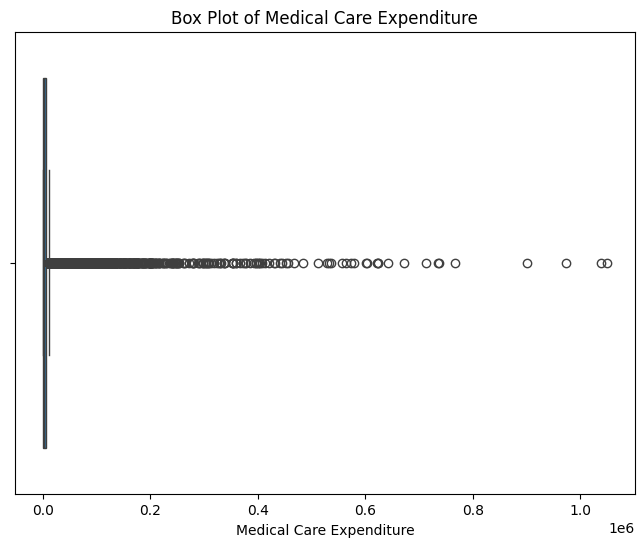

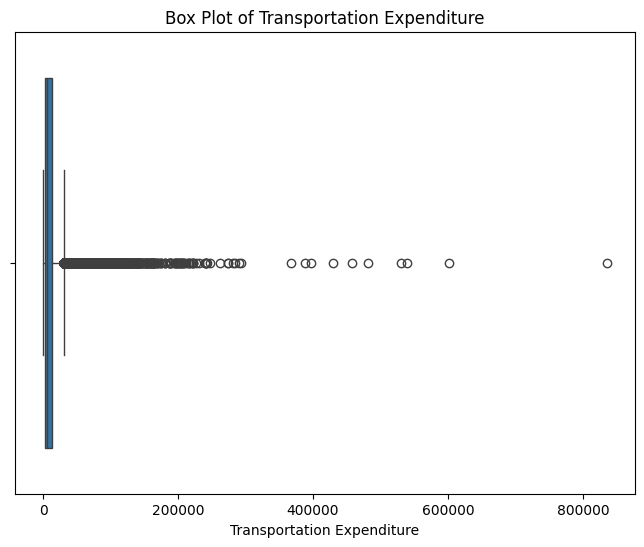

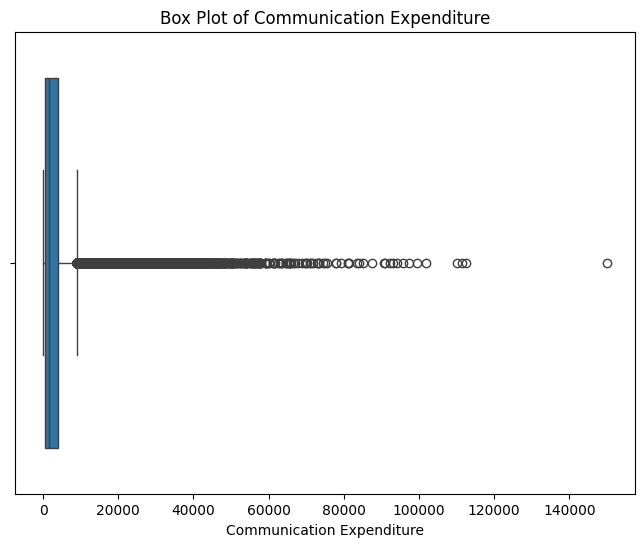

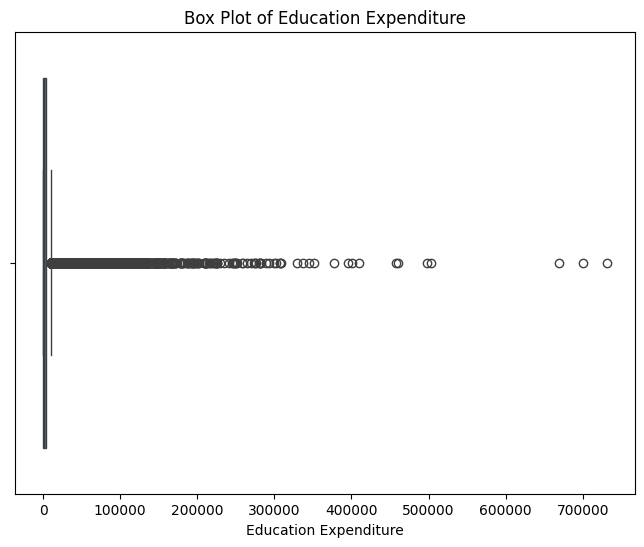

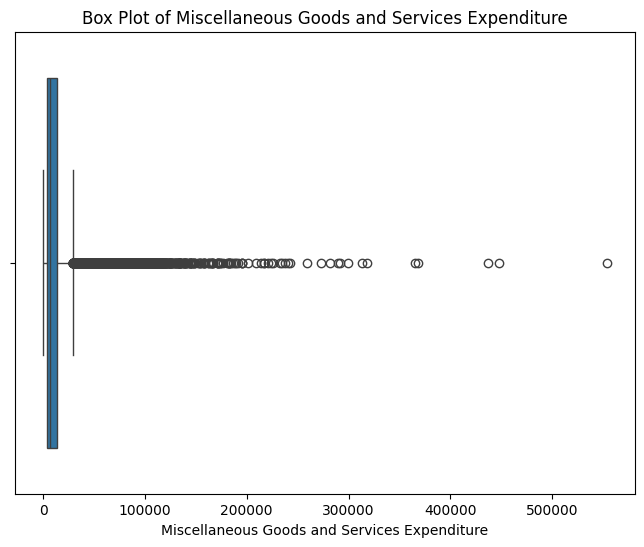

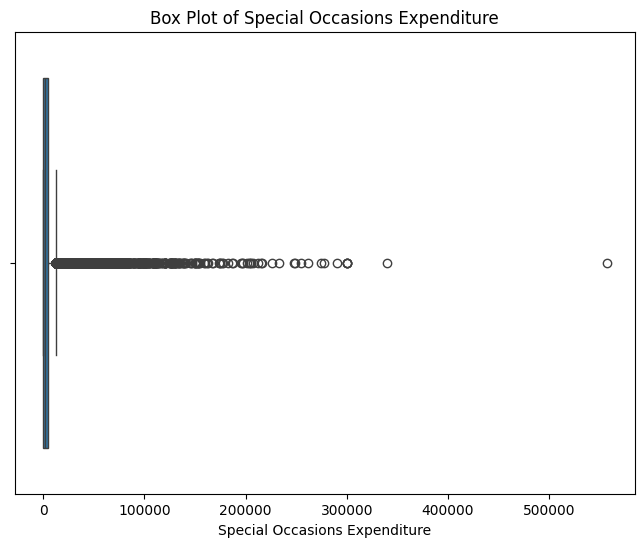

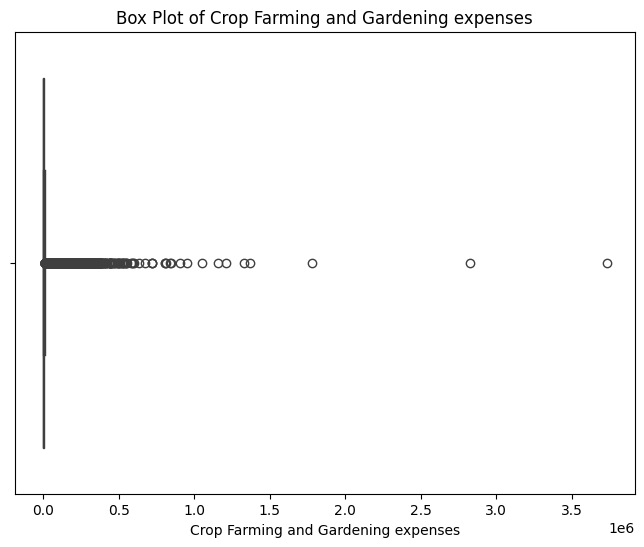

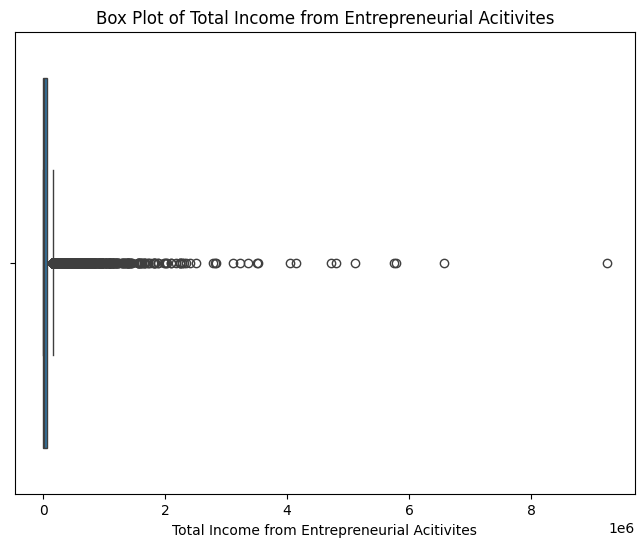

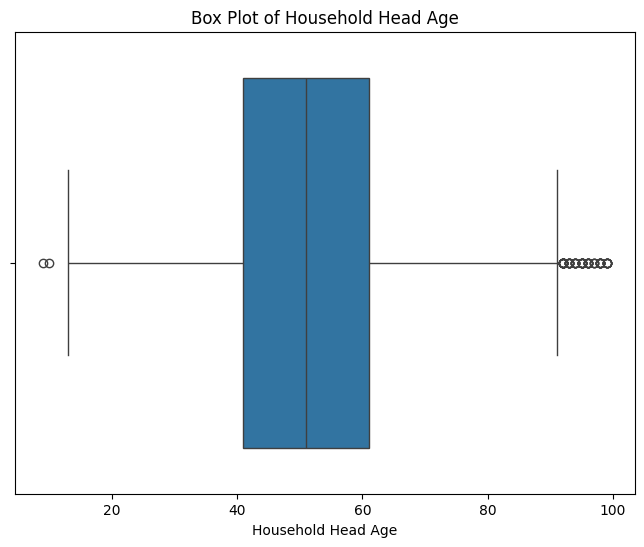

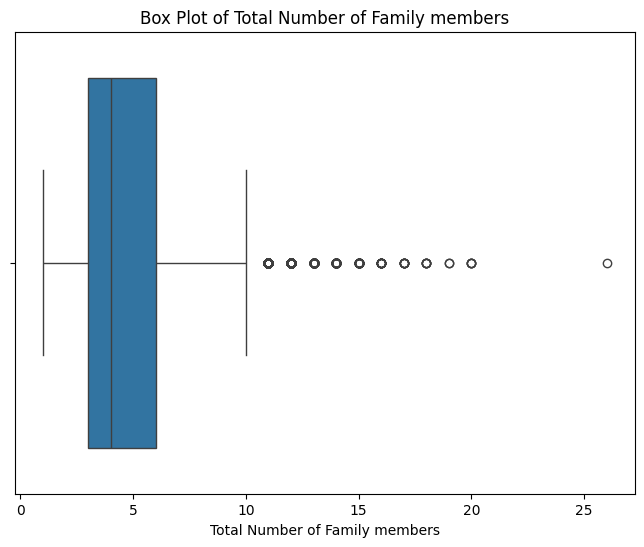

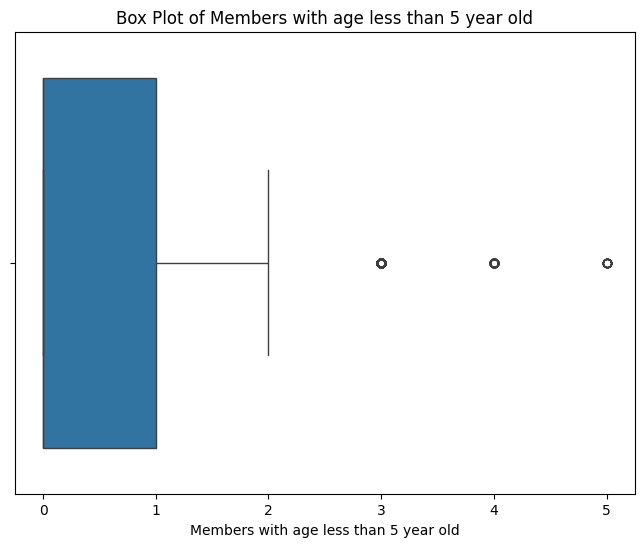

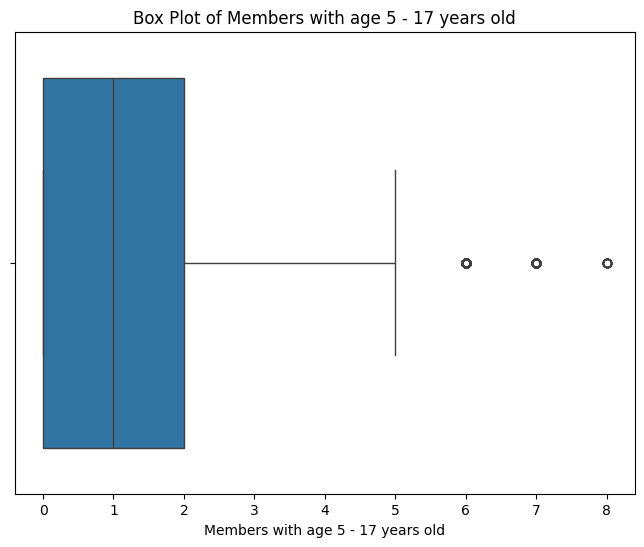

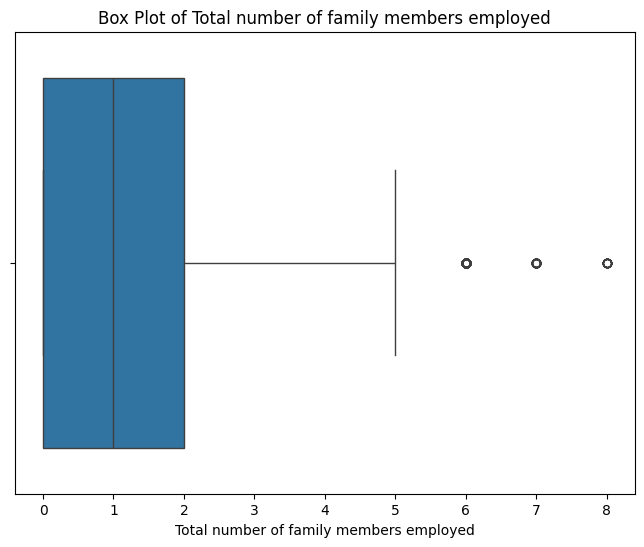

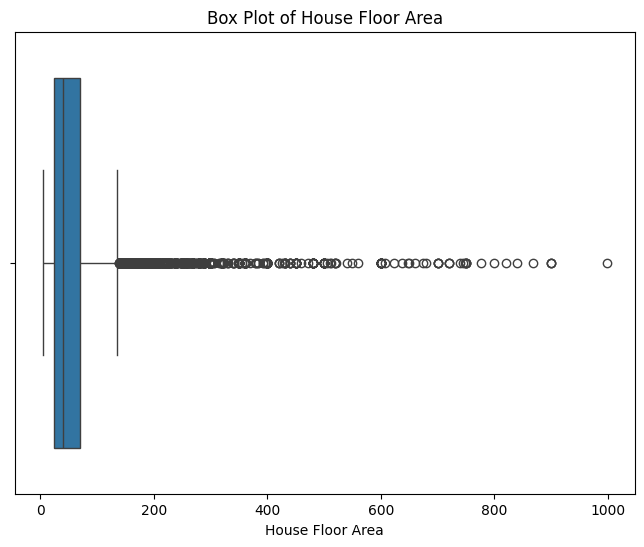

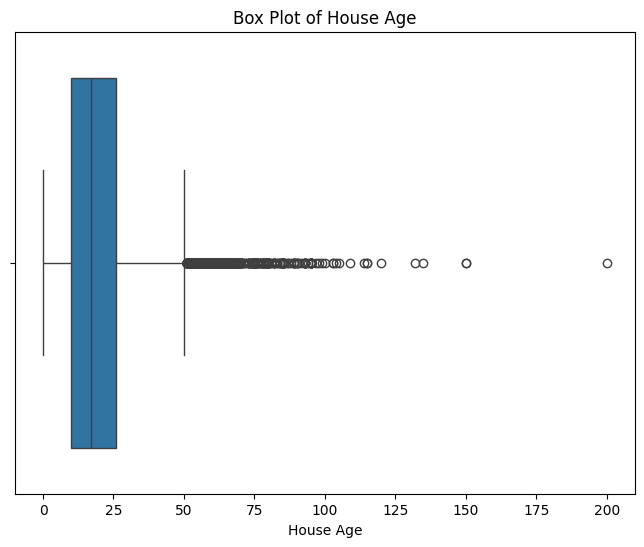

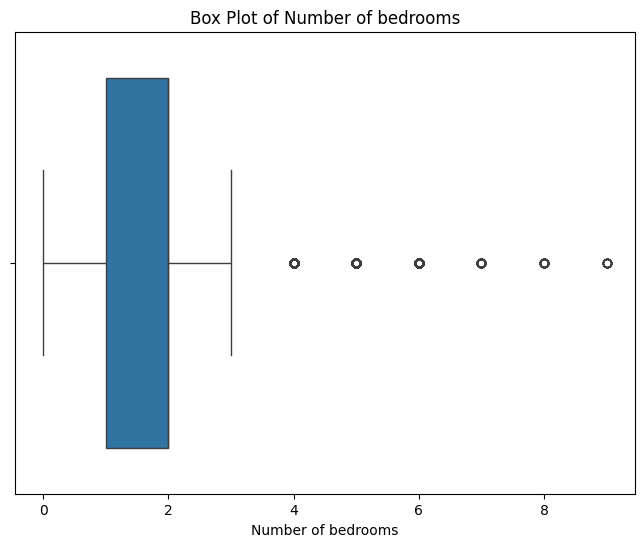

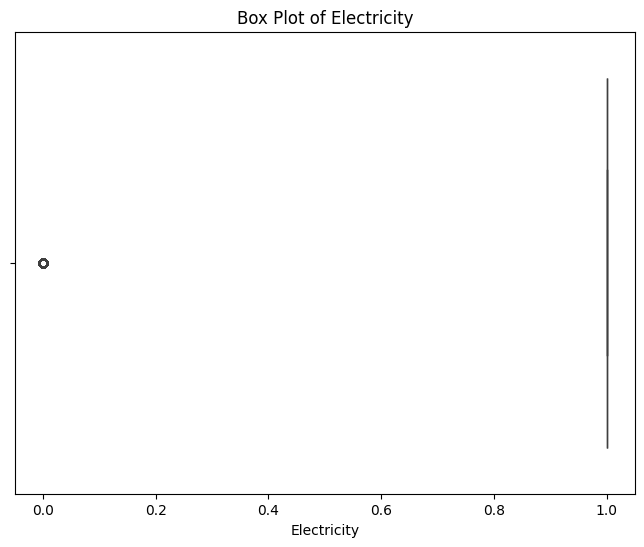

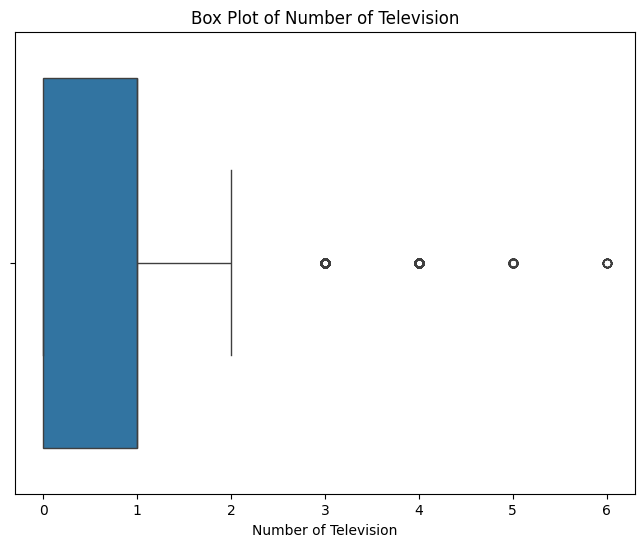

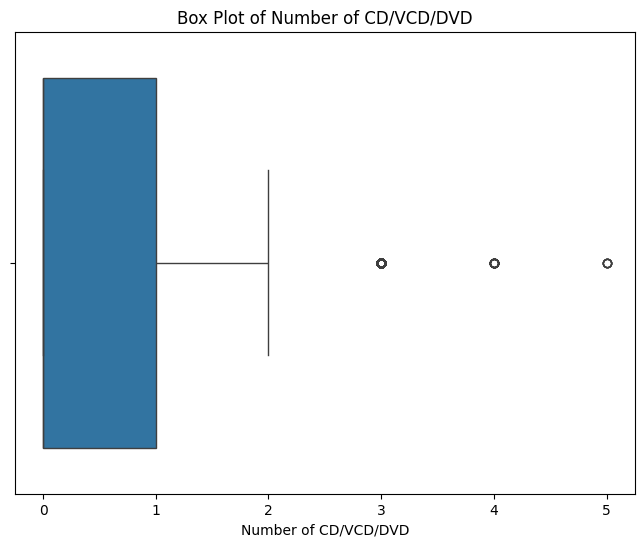

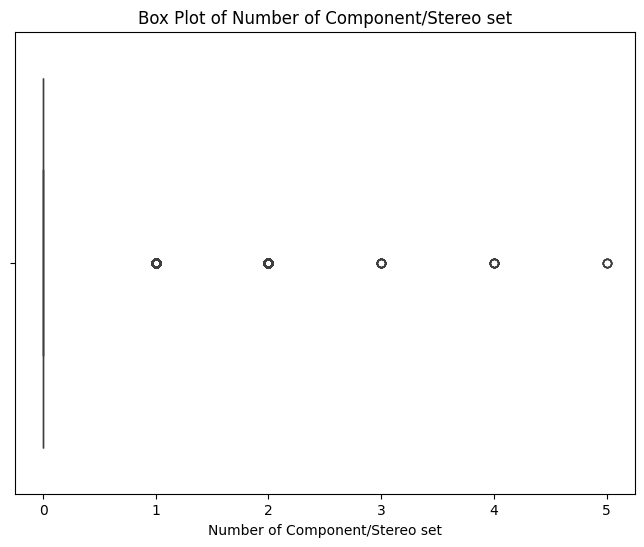

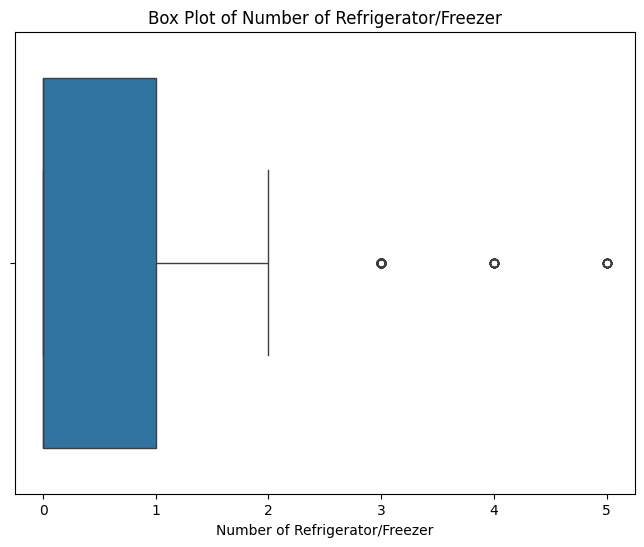

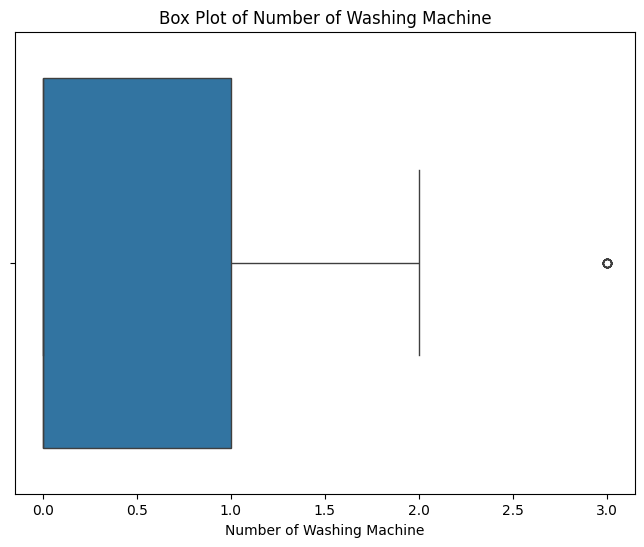

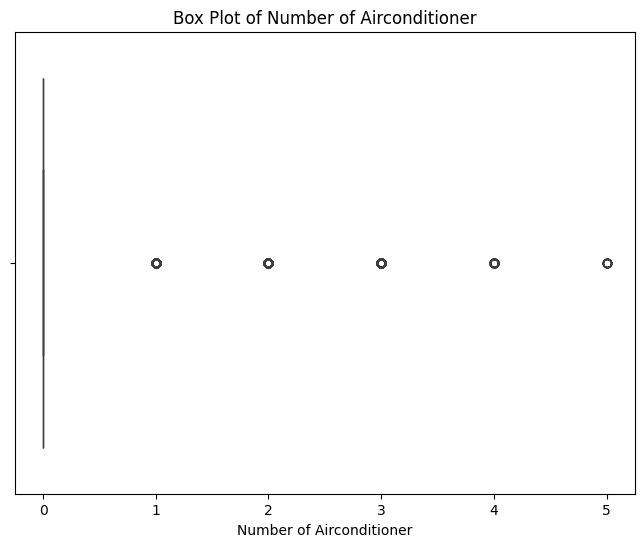

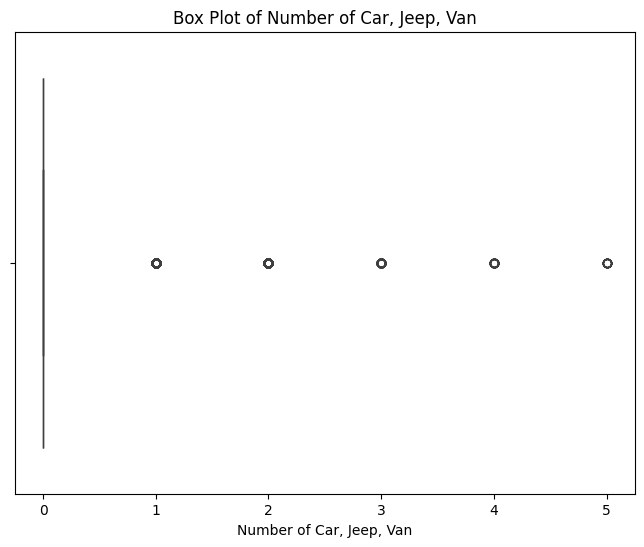

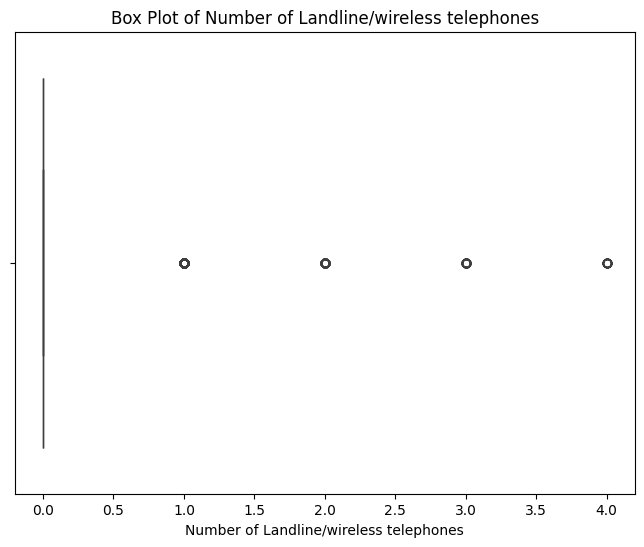

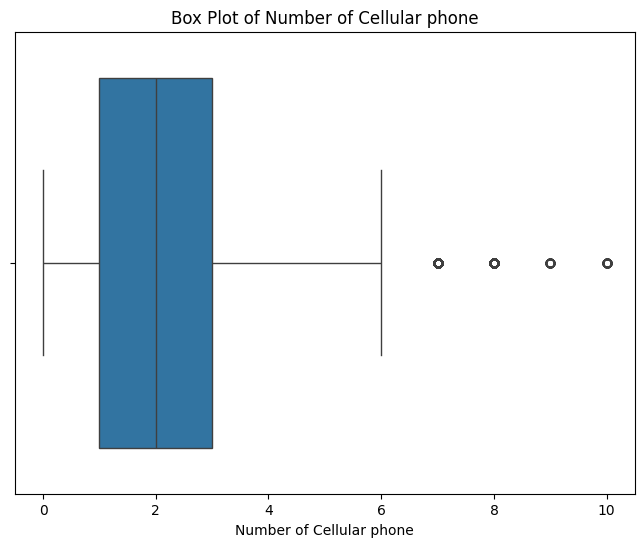

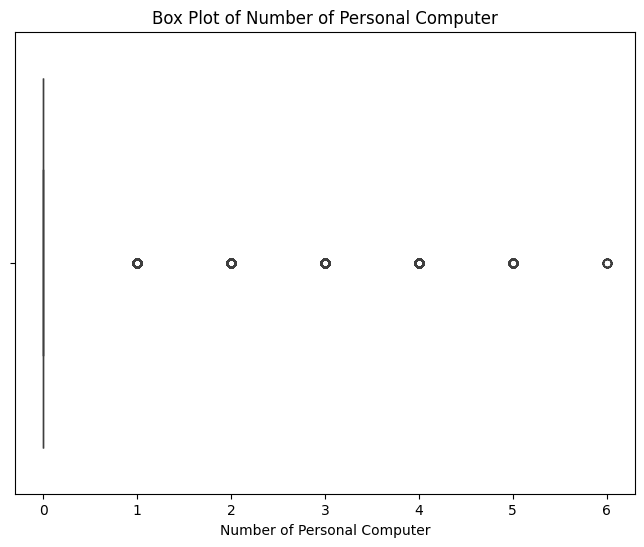

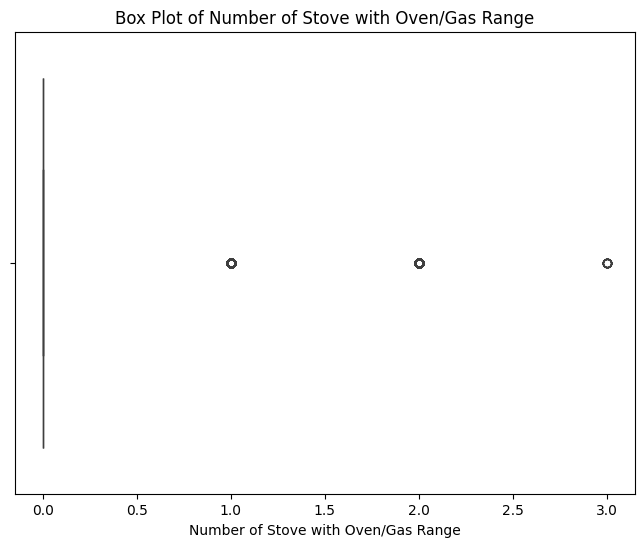

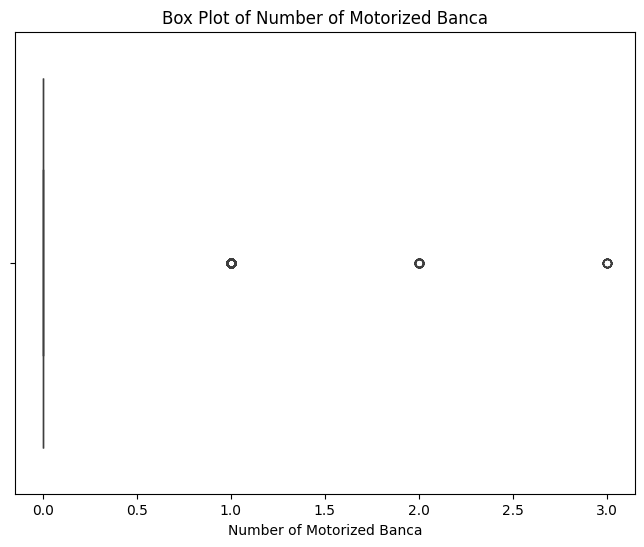

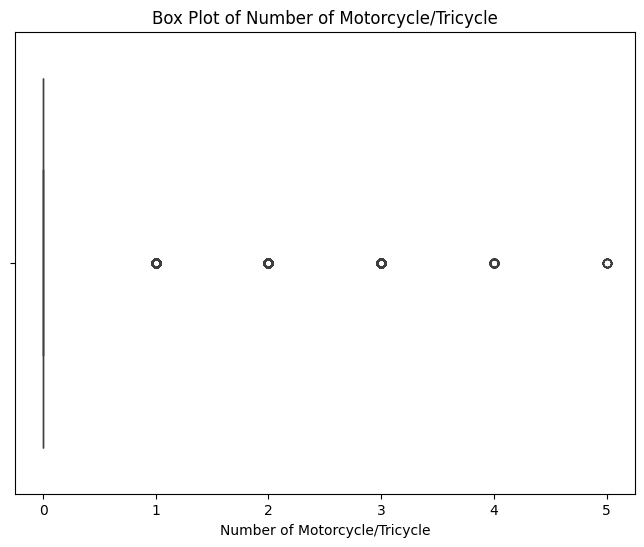

In [261]:
# Box Plot for Outliers for each numerical column, individually
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [262]:
# Average Total Household Income per Region
average_income_per_region = df.groupby('Region')['Total Household Income'].mean().sort_values(ascending=False)
average_income_per_region

Region
NCR                          420861.861501
IVA - CALABARZON             303360.536040
III - Central Luzon          292965.181650
CAR                          269540.484638
XI - Davao Region            238115.891251
I - Ilocos Region            238110.084327
II - Cagayan Valley          236778.221721
VII - Central Visayas        234909.314050
VI - Western Visayas         220481.260260
IVB - MIMAROPA               216685.124900
X - Northern Mindanao        214057.779544
Caraga                       196907.376543
VIII - Eastern Visayas       196736.581087
IX - Zasmboanga Peninsula    191000.908277
V - Bicol Region             186105.492718
XII - SOCCSKSARGEN           182984.802545
 ARMM                        134746.817616
Name: Total Household Income, dtype: float64

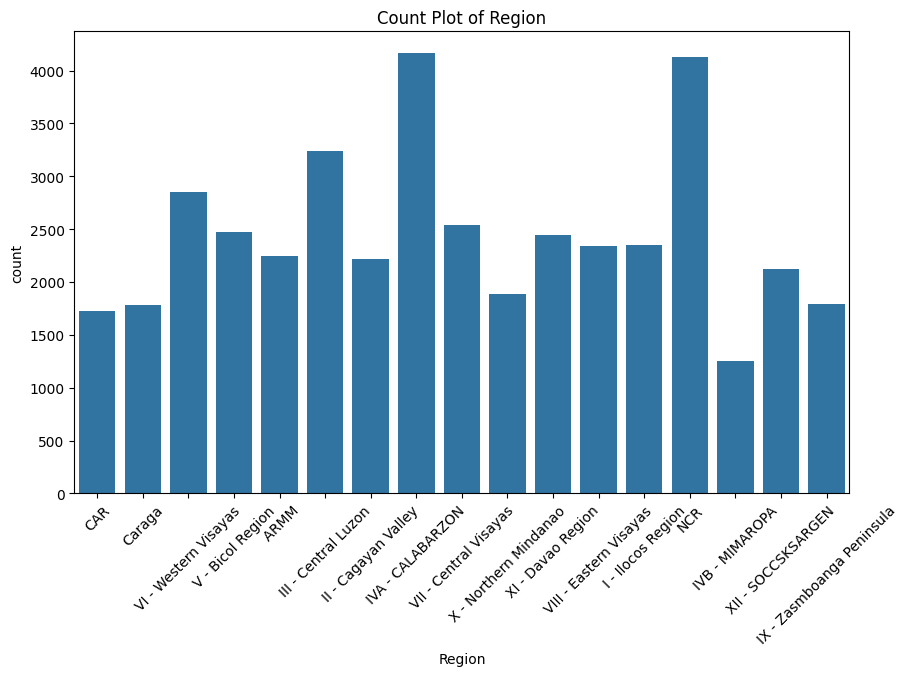

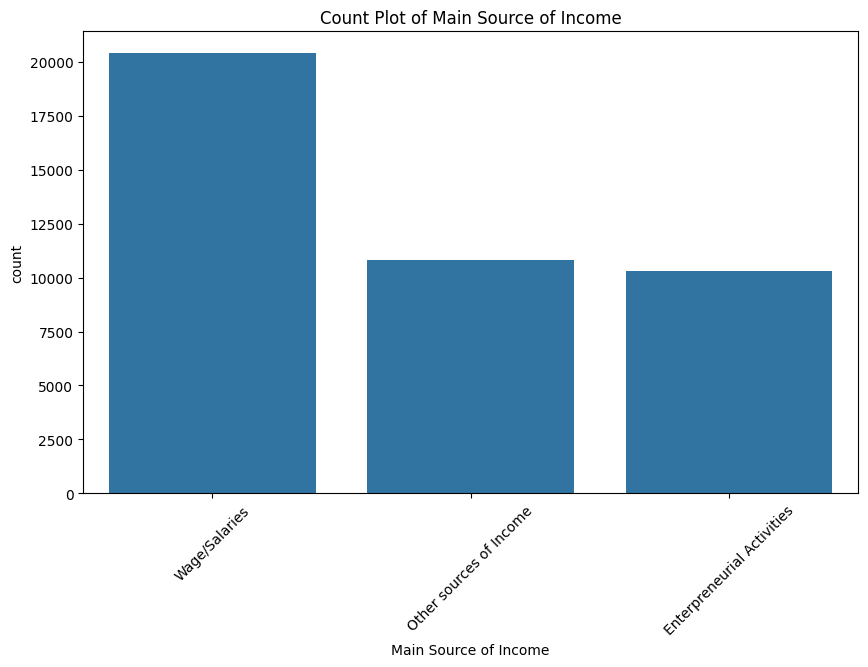

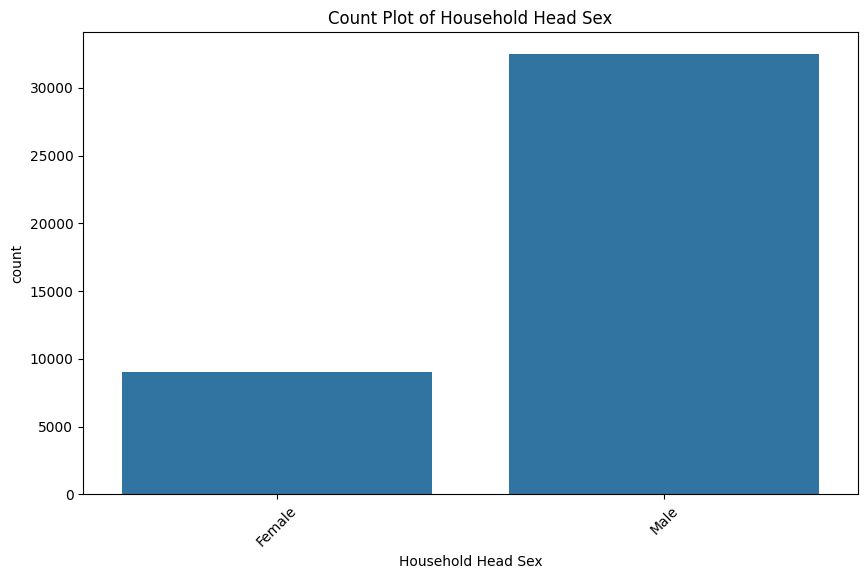

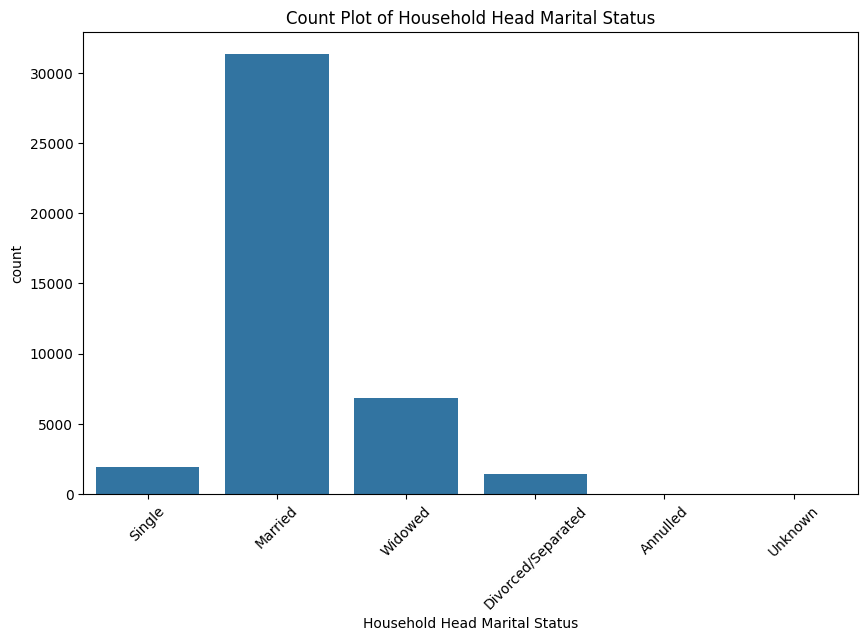

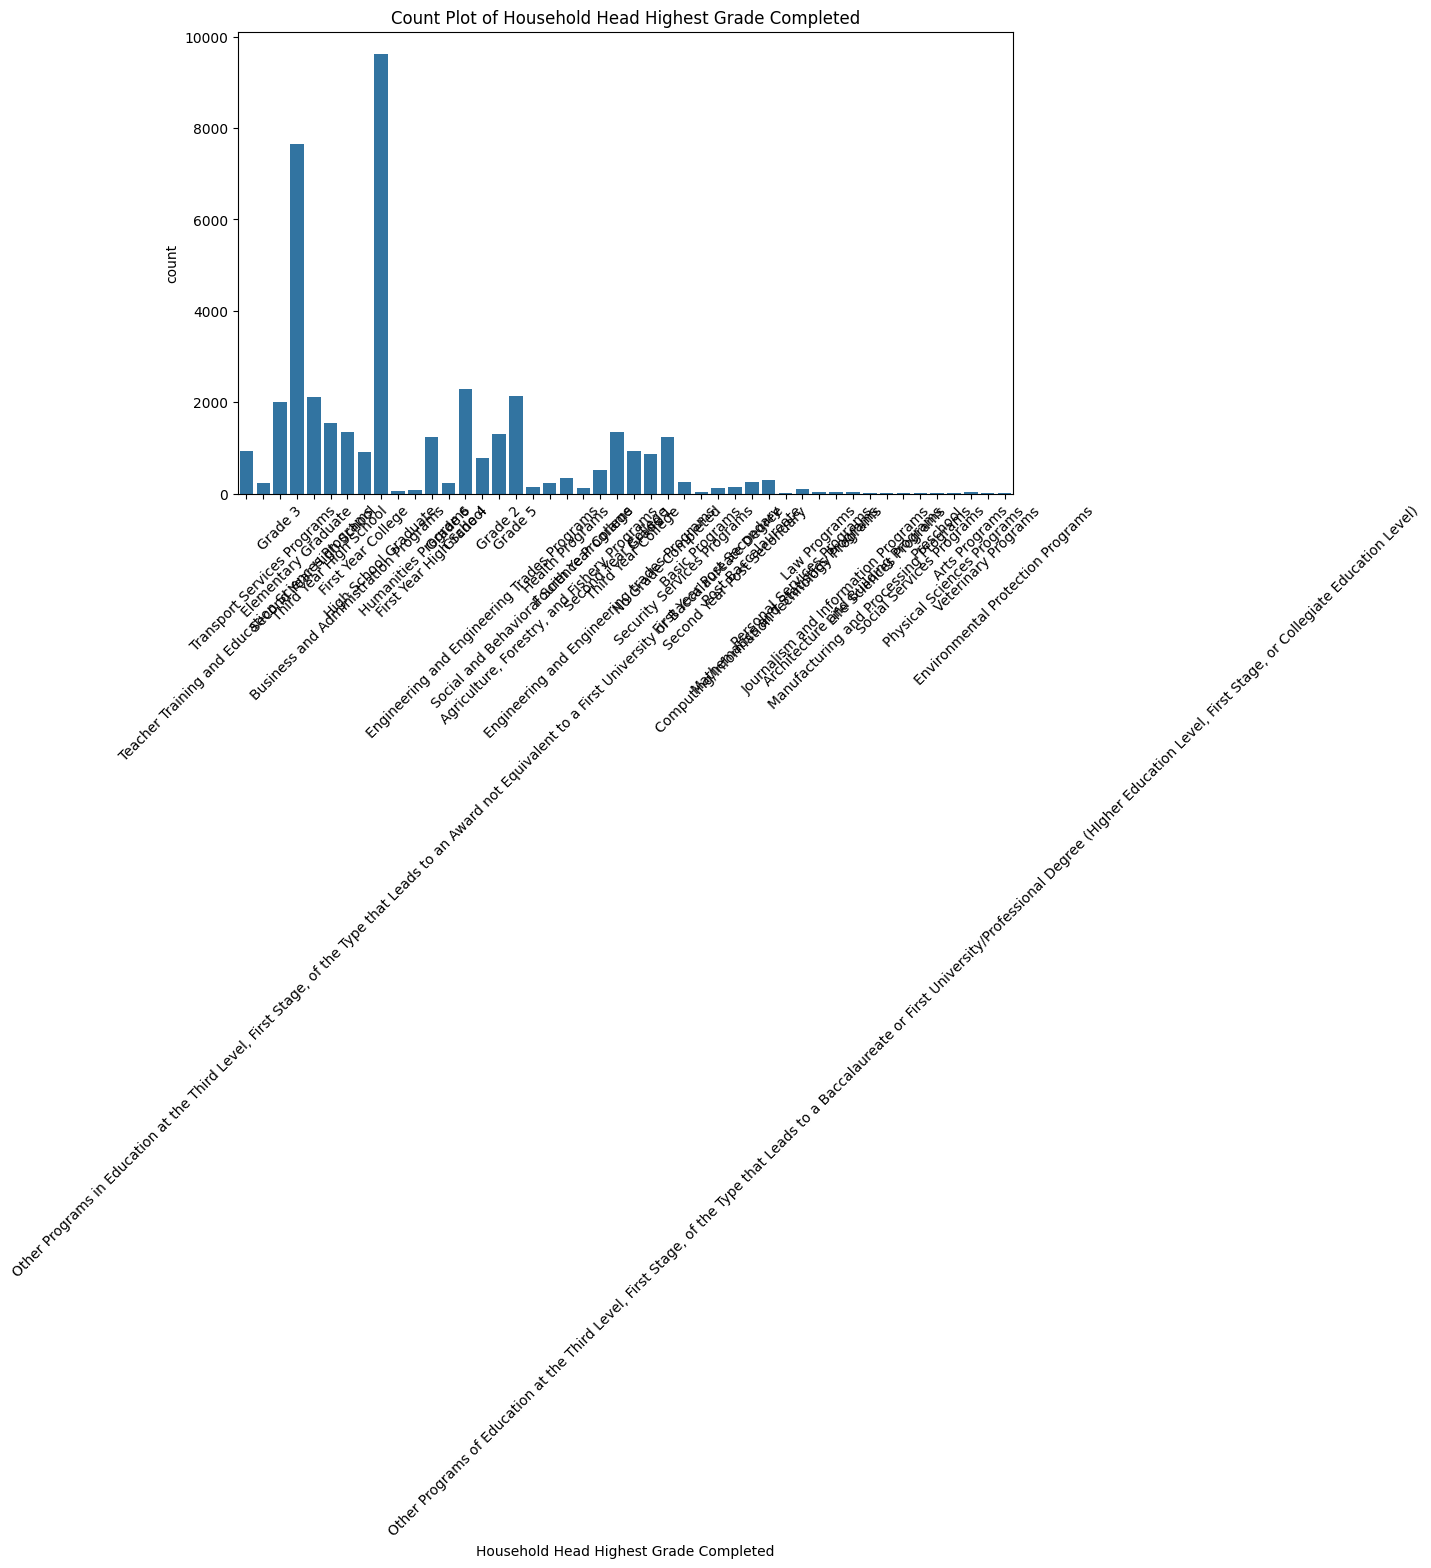

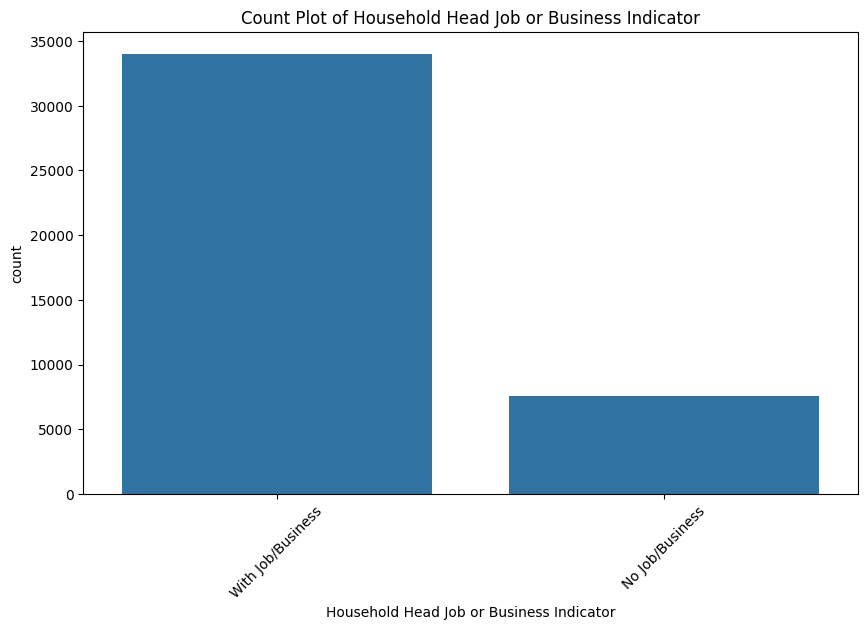

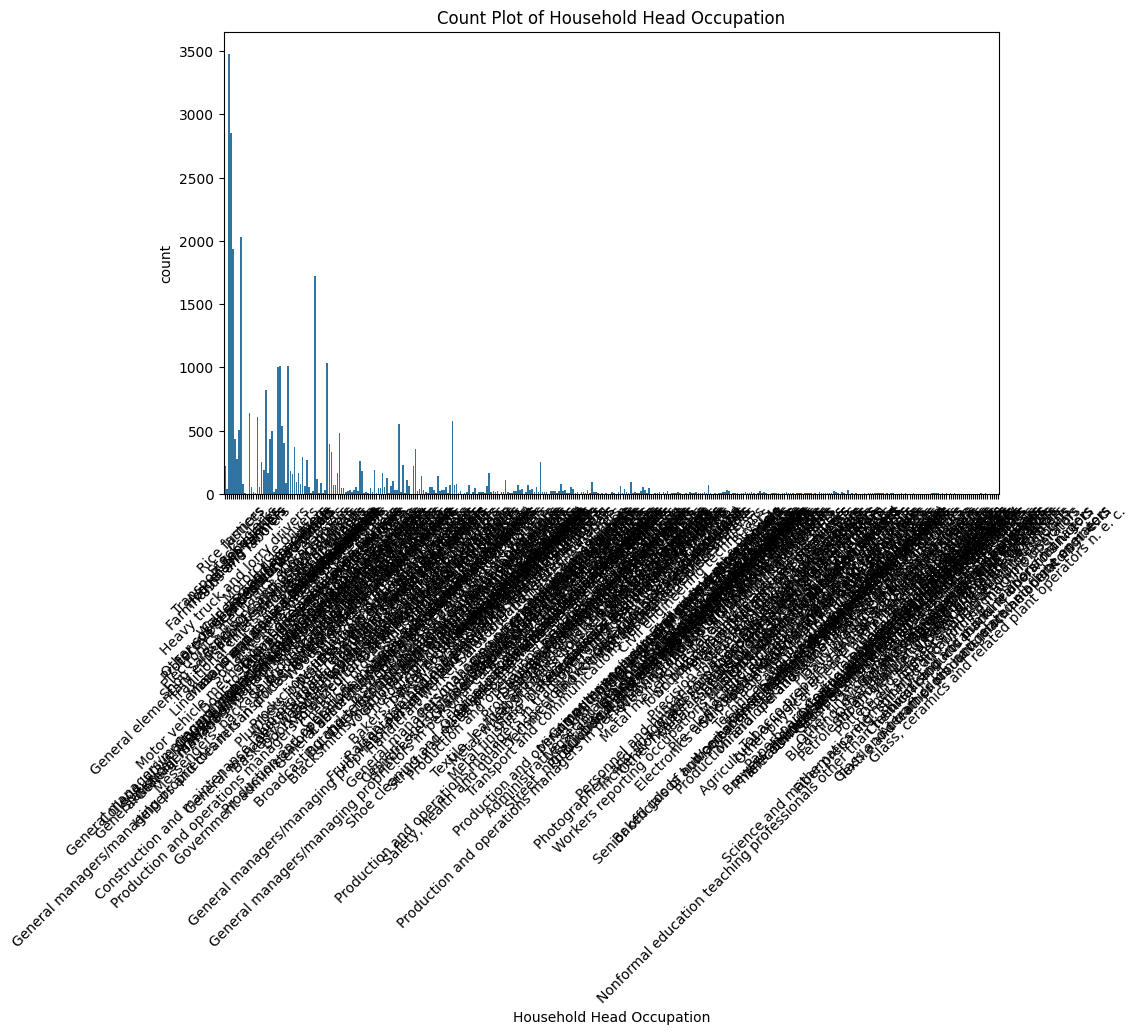

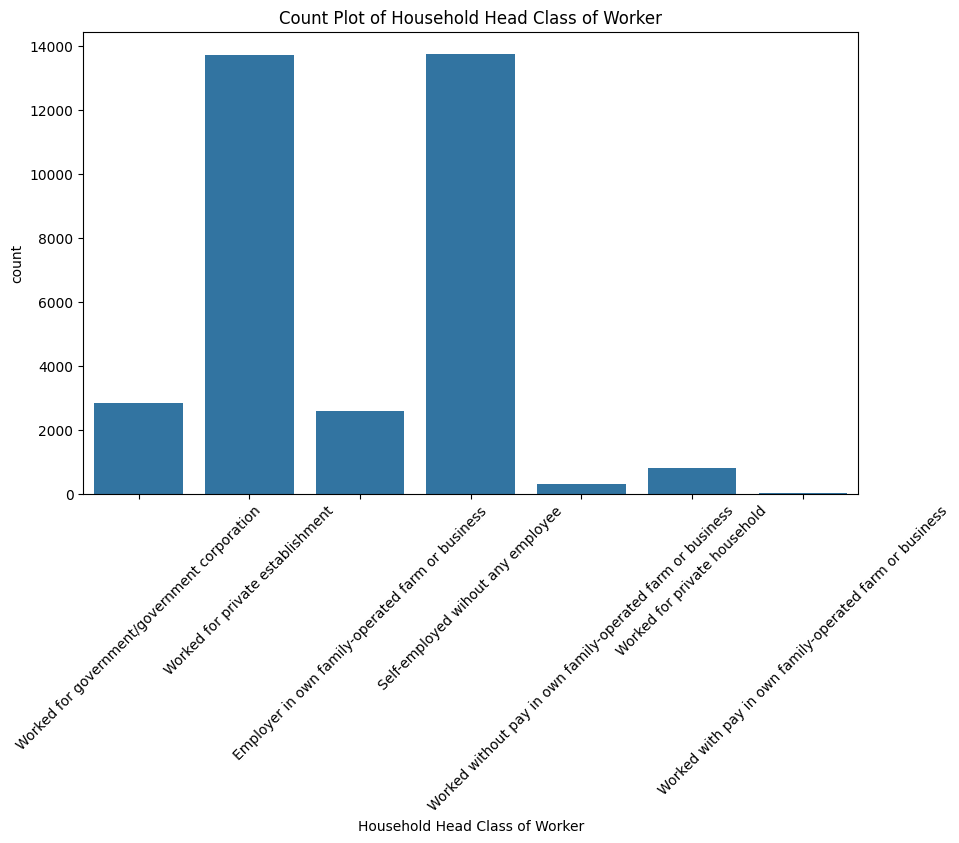

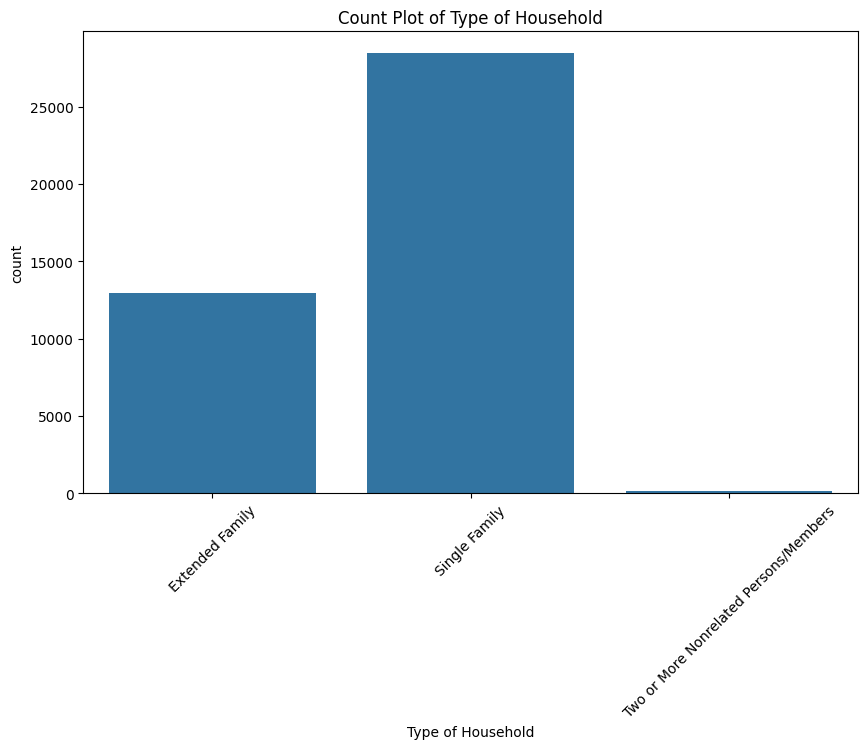

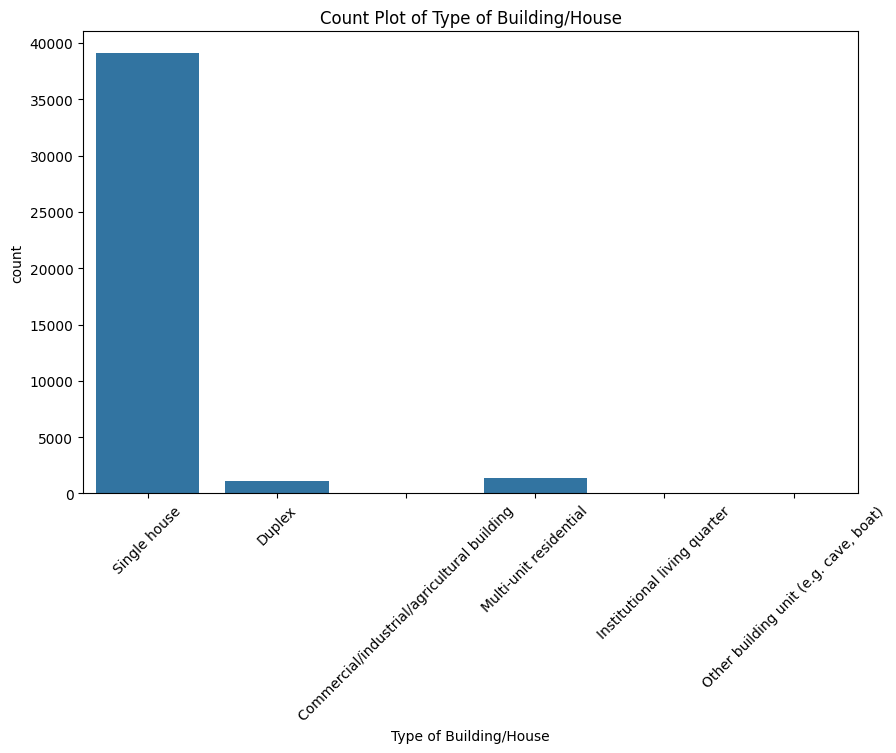

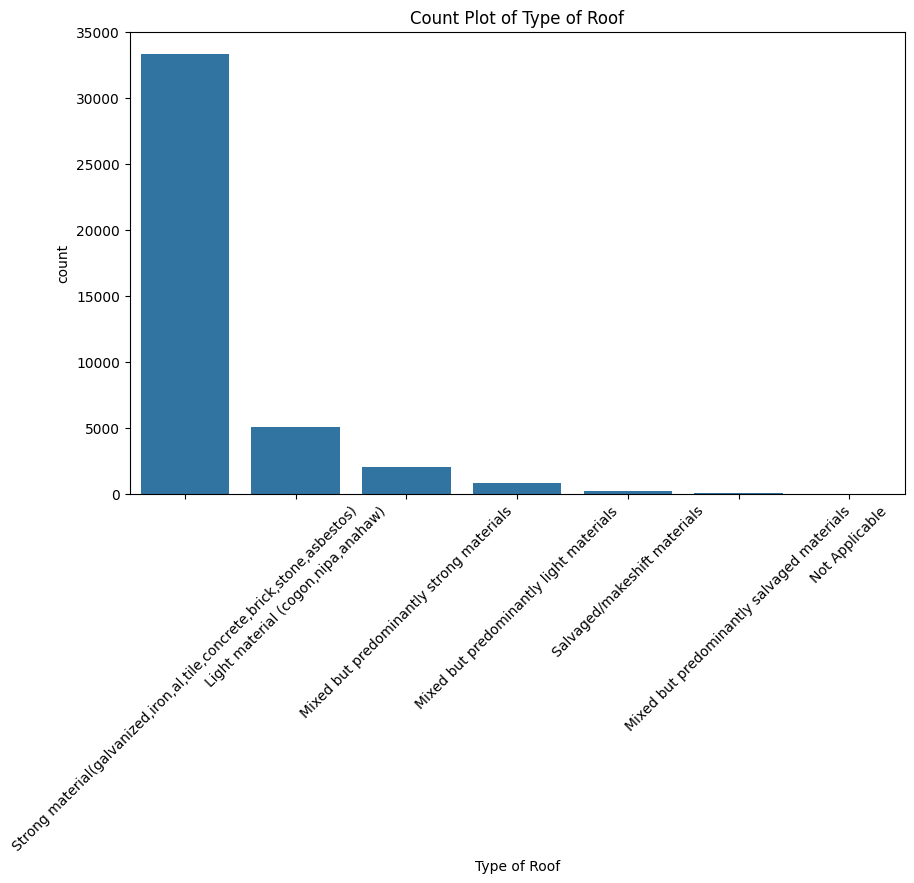

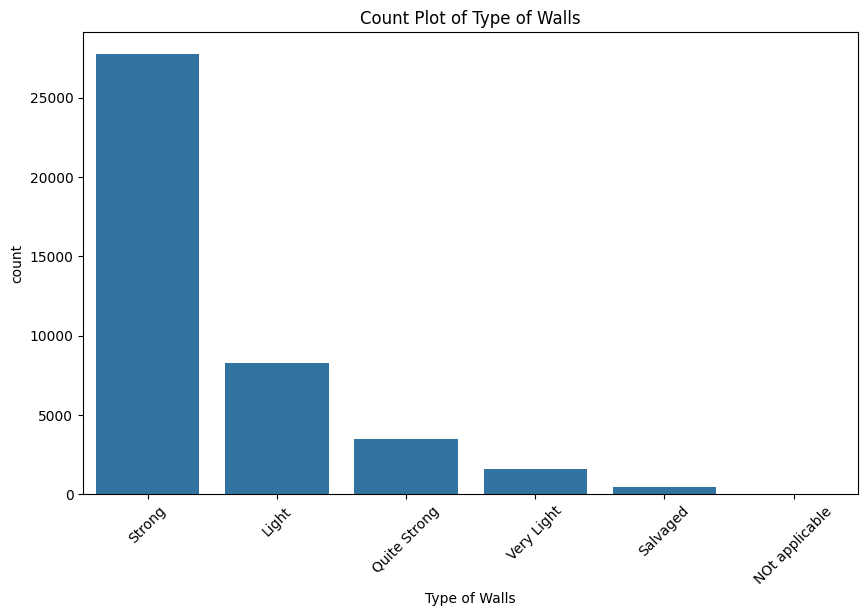

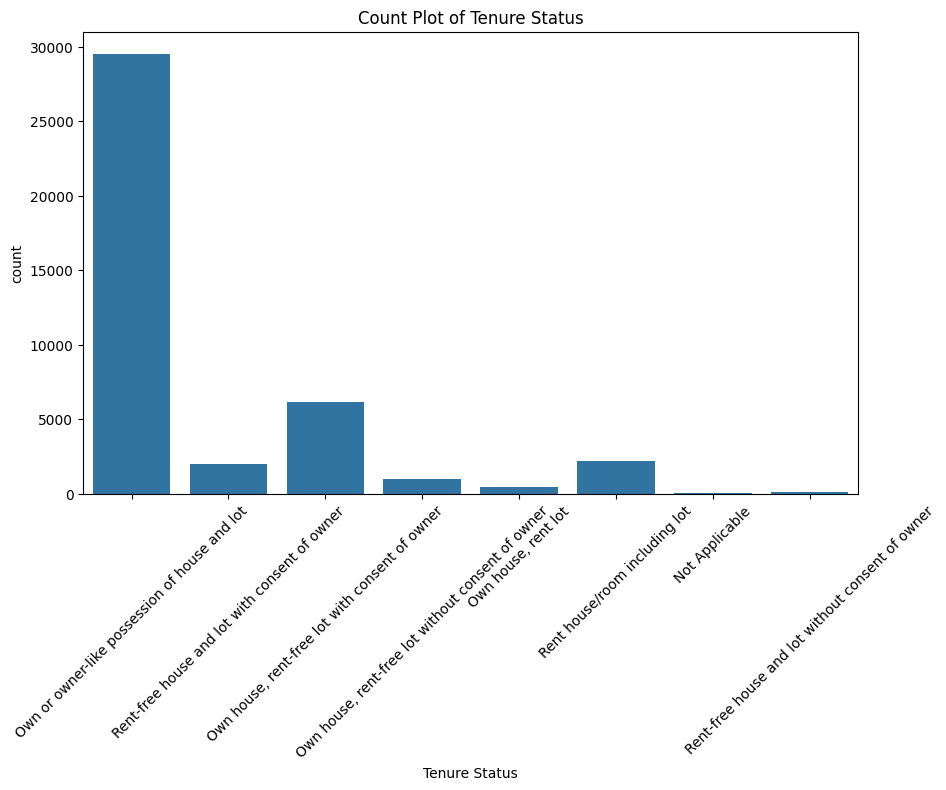

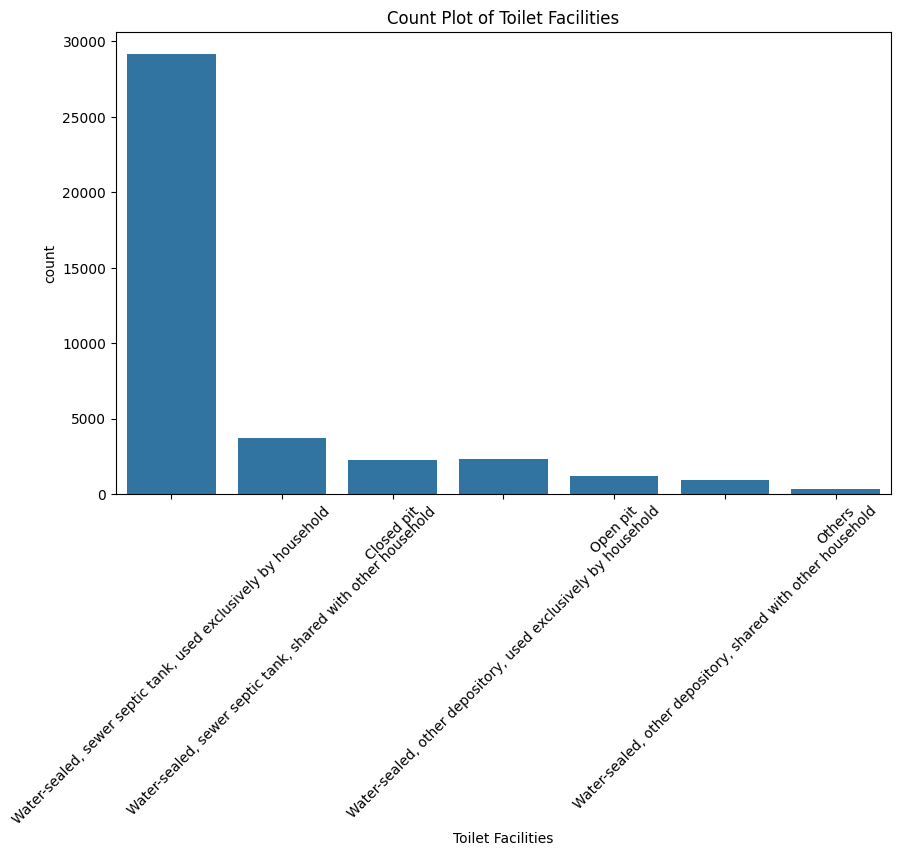

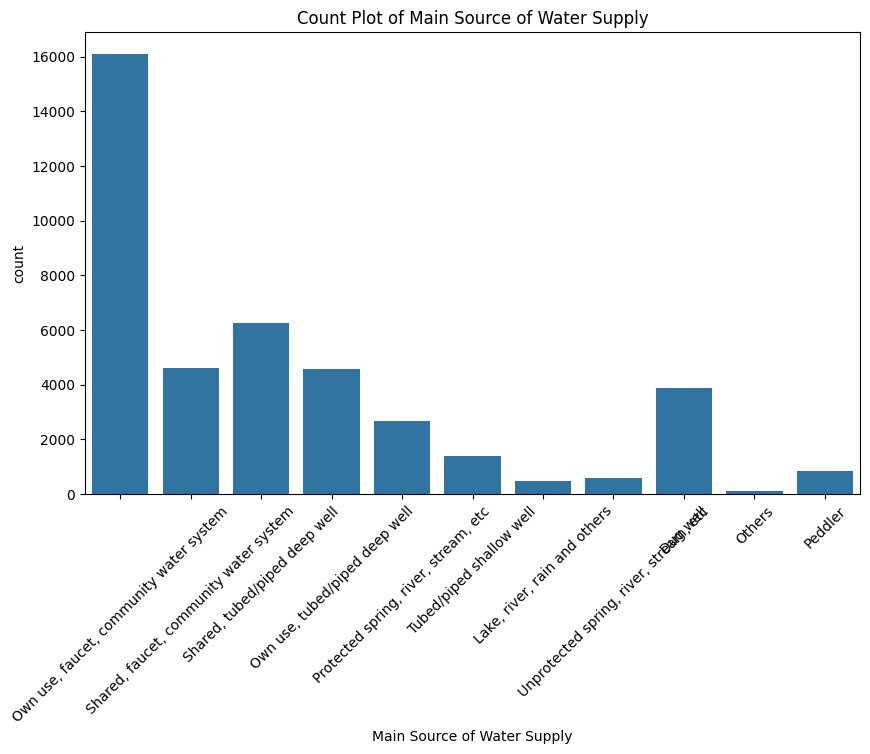

In [263]:
# Plot categorical columns. Tilt x values
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')

In [264]:
# Unique Values of Null Columns : Household Head Occupation, Household Head Class of Worker, Toilet Facilities
null_columns = df.columns[df.isna().any()]
null_columns

Index(['Household Head Occupation', 'Household Head Class of Worker',
       'Toilet Facilities'],
      dtype='object')

In [265]:
# Print unique values for each null column
for column in null_columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for Household Head Occupation: ['General elementary education teaching professionals'
 'Transport conductors' 'Farmhands and laborers' 'Rice farmers'
 'General managers/managing proprietors in transportation, storage and communications'
 'Heavy truck and lorry drivers' nan 'Hog raising farmers'
 'Vegetable farmers'
 'General managers/managing proprietors in wholesale and retail trade'
 'Stocks clerks' 'Justices' 'Other social science professionals'
 'Protective services workers n. e. c.' 'Secretaries'
 'Electronics mechanics and servicers' 'Foresters and related scientists'
 'Shop salespersons and demonstrators'
 'College, university and higher education teaching professionals'
 'General managers/managing proprietors of restaurants and hotels'
 'Welders and flamecutters' 'Car, taxi and van drivers'
 'Motor vehicle mechanics and related trades workers'
 'Traditional chiefs and heads of villages' 'Motorcycle drivers'
 'Statistical, mathematical and related associate profess

In [266]:
df['Household Head Highest Grade Completed'].value_counts()

Household Head Highest Grade Completed
High School Graduate                                                                                                                                                                                                   9628
Elementary Graduate                                                                                                                                                                                                    7640
Grade 4                                                                                                                                                                                                                2282
Grade 5                                                                                                                                                                                                                2123
Second Year High School                                                                                                                                                                                                2104
Grade 3                                                                                                                                                                                                                1994
Third Year High School                                                                                                                                                                                                 1545
Business and Administration Programs                                                                                                                                                                                   1344
Second Year College                                                                                                                                                                                                    1343
Grade 2                                                                                                                                                                                                                1311
First Year High School                                                                                                                                                                                                 1247
No Grade Completed                                                                                                                                                                                                     1228
Third Year College                                                                                                                                                                                                      924
Teacher Training and Education Sciences Programs                                                                                                                                                                        922
First Year College                                                                                                                                                                                                      907
Grade 1                                                                                                                                                                                                                 874
Engineering and Engineering Trades Programs                                                                                                                                                                             777
Engineering and Engineering trades Programs                                                                                                                                                                             522
H

In [267]:
df['Household Head Class of Worker'].value_counts()

Household Head Class of Worker
Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: count, dtype: int64

In [268]:
# Print Columns of Data Frame
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [269]:
# Regions of Rows with Null Columns
df[df['Household Head Occupation'].isna()]['Region'].value_counts() # 7536 Null Values

Region
NCR                          1021
IVA - CALABARZON              924
III - Central Luzon           804
I - Ilocos Region             553
VI - Western Visayas          548
VII - Central Visayas         449
V - Bicol Region              411
VIII - Eastern Visayas        370
XI - Davao Region             366
II - Cagayan Valley           365
XII - SOCCSKSARGEN            314
CAR                           297
X - Northern Mindanao         289
Caraga                        278
IX - Zasmboanga Peninsula     247
 ARMM                         154
IVB - MIMAROPA                146
Name: count, dtype: int64

In [270]:
df[df['Household Head Class of Worker'].isna()]['Region'].value_counts() #7536 Null Values

Region
NCR                          1021
IVA - CALABARZON              924
III - Central Luzon           804
I - Ilocos Region             553
VI - Western Visayas          548
VII - Central Visayas         449
V - Bicol Region              411
VIII - Eastern Visayas        370
XI - Davao Region             366
II - Cagayan Valley           365
XII - SOCCSKSARGEN            314
CAR                           297
X - Northern Mindanao         289
Caraga                        278
IX - Zasmboanga Peninsula     247
 ARMM                         154
IVB - MIMAROPA                146
Name: count, dtype: int64

In [271]:
# Regions of Rows with Null 'Household Head Occupation' and 'Household Head Class of Worker'
df[(df['Household Head Occupation'].isna()) & (df['Household Head Class of Worker'].isna())]['Region'].value_counts() # 1580 Null Values

Region
NCR                          1021
IVA - CALABARZON              924
III - Central Luzon           804
I - Ilocos Region             553
VI - Western Visayas          548
VII - Central Visayas         449
V - Bicol Region              411
VIII - Eastern Visayas        370
XI - Davao Region             366
II - Cagayan Valley           365
XII - SOCCSKSARGEN            314
CAR                           297
X - Northern Mindanao         289
Caraga                        278
IX - Zasmboanga Peninsula     247
 ARMM                         154
IVB - MIMAROPA                146
Name: count, dtype: int64

In [272]:
df[df['Toilet Facilities'].isna()]['Region'].value_counts() # 1580 Null Values

Region
V - Bicol Region             277
VI - Western Visayas         224
VIII - Eastern Visayas       210
VII - Central Visayas        193
 ARMM                        144
IVA - CALABARZON             112
XII - SOCCSKSARGEN            86
IVB - MIMAROPA                76
Caraga                        74
IX - Zasmboanga Peninsula     43
I - Ilocos Region             35
XI - Davao Region             27
X - Northern Mindanao         26
CAR                           21
III - Central Luzon           17
NCR                           10
II - Cagayan Valley            5
Name: count, dtype: int64

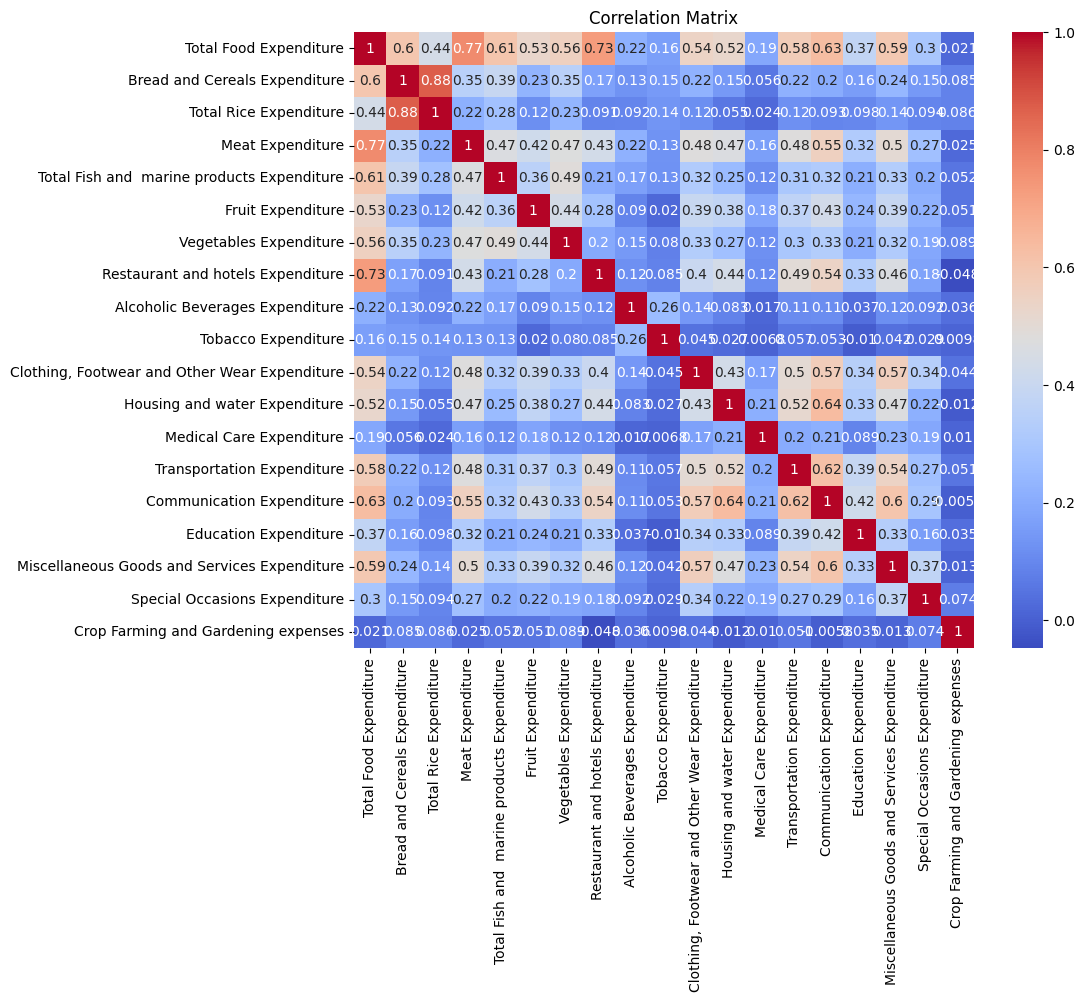

In [273]:
# Plot Correlation Matrix for Numerical Values
plt.figure(figsize=(10, 8))
sns.heatmap(df[expenditure_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [274]:
# Duplicate dataset
df_copy = df.copy()

In [275]:
# Log Transform All Expenditures and Income
df_copy[expenditure_columns] = df_copy[expenditure_columns].apply(np.log1p)
df_copy[income_columns] = df_copy[income_columns].apply(np.log1p)

In [276]:
# Scale numerical Features for clustering Analysis
# scaler = StandardScaler()
scaler = MinMaxScaler()
df_copy[numerical_columns] = scaler.fit_transform(df_copy[numerical_columns])

In [277]:
# Fill Null Columns with 'Unknown'
df_copy[null_columns] = df_copy[null_columns].fillna('Unknown')

In [278]:
# One Hot Selected Columns
df_copy = pd.get_dummies(df_copy, columns=['Region', 'Main Source of Income',
                                           'Household Head Sex', 'Household Head Marital Status',
                                           'Household Head Job or Business Indicator', 'Type of Household'], drop_first=True)

In [279]:
# Remove One Hotted Columns from Categorical Columns
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Region'))
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Main Source of Income'))
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Household Head Sex'))
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Household Head Marital Status'))
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Household Head Job or Business Indicator'))
categorical_columns = np.delete(categorical_columns, np.where(categorical_columns == 'Type of Household'))

In [280]:
# Convert all one-hot columns to int
for col in df_copy.columns:
    if col.startswith('Region_') or col.startswith('Main Source of Income_') or col.startswith('Household Head Sex_') or col.startswith('Household Head Marital Status_') or col.startswith('Household Head Job or Business Indicator_') or col.startswith('Type of Household_'):
        df_copy[col] = df_copy[col].astype(int)

In [281]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 81 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Total Household Income                                      41544 non-null  float64
 1   Total Food Expenditure                                      41544 non-null  float64
 2   Agricultural Household indicator                            41544 non-null  int64  
 3   Bread and Cereals Expenditure                               41544 non-null  float64
 4   Total Rice Expenditure                                      41544 non-null  float64
 5   Meat Expenditure                                            41544 non-null  float64
 6   Total Fish and  marine products Expenditure                 41544 non-null  float64
 7   Fruit Expenditure                                           41544 non-null  float64
 

In [282]:
# Remove Columns of type object
df_copy = df_copy.select_dtypes(exclude=['object'])

In [194]:
# Label Encode Categorical Values
label_encoder = LabelEncoder()
df_copy[categorical_columns] = df_copy[categorical_columns].apply(label_encoder.fit_transform)

In [285]:
df_copy.head()

Total Household Income  Total Food Expenditure  \
0                0.539417                0.654256   
1                0.412143                0.556102   
2                0.286569                0.539206   
3                0.324256                0.581480   
4                0.405527                0.615324   

   Agricultural Household indicator  Bread and Cereals Expenditure  \
0                                 0                       0.785959   
1                                 0                       0.720375   
2                                 1                       0.770512   
3                                 0                       0.770183   
4                                 0                       0.771877   

   Total Rice Expenditure  Meat Expenditure  \
0                0.779477          0.810748   
1                0.699718          0.782899   
2                0.766205          0.718254   
3                0.758059          0.745355   
4                0.761846          0.787183   

   Total Fish and  marine products Expenditure  Fruit Expenditure  \
0                                     0.801095           0.647723   
1                                     0.766745           0.608524   
2                                     0.647147           0.595561   
3                                     0.764781           0.522214   
4                                     0.768481           0.578382   

   Vegetables Expenditure  Restaurant and hotels Expenditure  ...  \
0                0.847180                           0.593338  ...   
1                0.798945                           0.575563  ...   
2                0.734385                           0.624114  ...   
3                0.799557                           0.648071  ...   
4                0.831279                           0.649473  ...   

   Main Source of Income_Wage/Salaries  Household Head Sex_Male  \
0                                    1                        0   
1                                    1                        1   
2                                    1                        1   
3                                    1                        1   
4                                    1                        1   

   Household Head Marital Status_Divorced/Separated  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Household Head Marital Status_Married  \
0                                      0   
1                                      1   
2                                      1   
3                                      1   
4                                      1   

   Household Head Marital Status_Single  \
0                                     1   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Household Head Marital Status_Unknown  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Household Head Marital Status_Widowed  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Household Head Job or Business Indicator_With Job/Business  \
0                                                  1            
1                                                  1            
2                                                  1            
3                                                  1            
4                                    

In [286]:
df_copy.isna().sum()

Total Household Income                                        0
Total Food Expenditure                                        0
Agricultural Household indicator                              0
Bread and Cereals Expenditure                                 0
Total Rice Expenditure                                        0
                                                             ..
Household Head Marital Status_Unknown                         0
Household Head Marital Status_Widowed                         0
Household Head Job or Business Indicator_With Job/Business    0
Type of Household_Single Family                               0
Type of Household_Two or More Nonrelated Persons/Members      0
Length: 72, dtype: int64

In [287]:
df_copy.duplicated().sum()

0

# Model Training

For cluster = 1, SSE/WCSS is 162602.71570129003
For cluster = 2, SSE/WCSS is 144211.27126934158
For cluster = 3, SSE/WCSS is 131029.9043978824
For cluster = 4, SSE/WCSS is 121889.38818750053
For cluster = 5, SSE/WCSS is 115537.24323353785
For cluster = 6, SSE/WCSS is 112307.38807375576
For cluster = 7, SSE/WCSS is 109267.79473763597
For cluster = 8, SSE/WCSS is 106502.68800108558
For cluster = 9, SSE/WCSS is 104330.55022604055
For cluster = 10, SSE/WCSS is 102676.64277823106


Text(0, 0.5, 'WCSS')

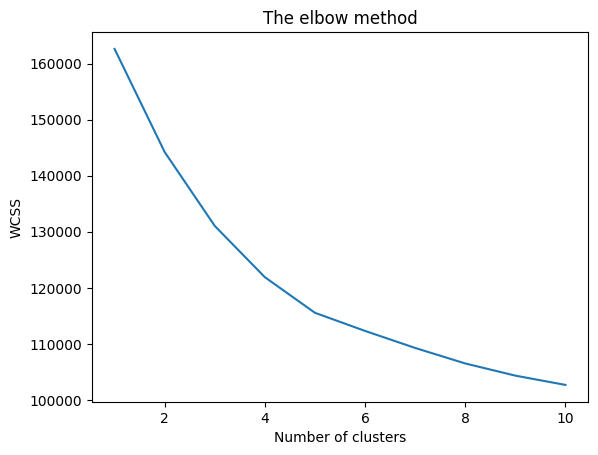

In [288]:
# Use Elbow Method to find optimal KMeans
from sklearn.cluster import KMeans

wcss=[]
sse = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(df_copy)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [289]:
from sklearn.metrics import silhouette_score
wcss = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters= k,max_iter=100).fit(df_copy)
  label = kmeans.labels_
  sil_coeff = silhouette_score(df_copy,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

For cluster= 2, Silhouette Coefficient is 0.17981077428346437
For cluster= 3, Silhouette Coefficient is 0.12567218805287728
For cluster= 4, Silhouette Coefficient is 0.09921251708858701
For cluster= 5, Silhouette Coefficient is 0.11462904382921138
For cluster= 6, Silhouette Coefficient is 0.09293162402959257
For cluster= 7, Silhouette Coefficient is 0.10069982805738009
For cluster= 8, Silhouette Coefficient is 0.09696841381565362
For cluster= 9, Silhouette Coefficient is 0.09384060820663188


In [290]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def visualize_silhouette(cluster_lists, X_features):

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

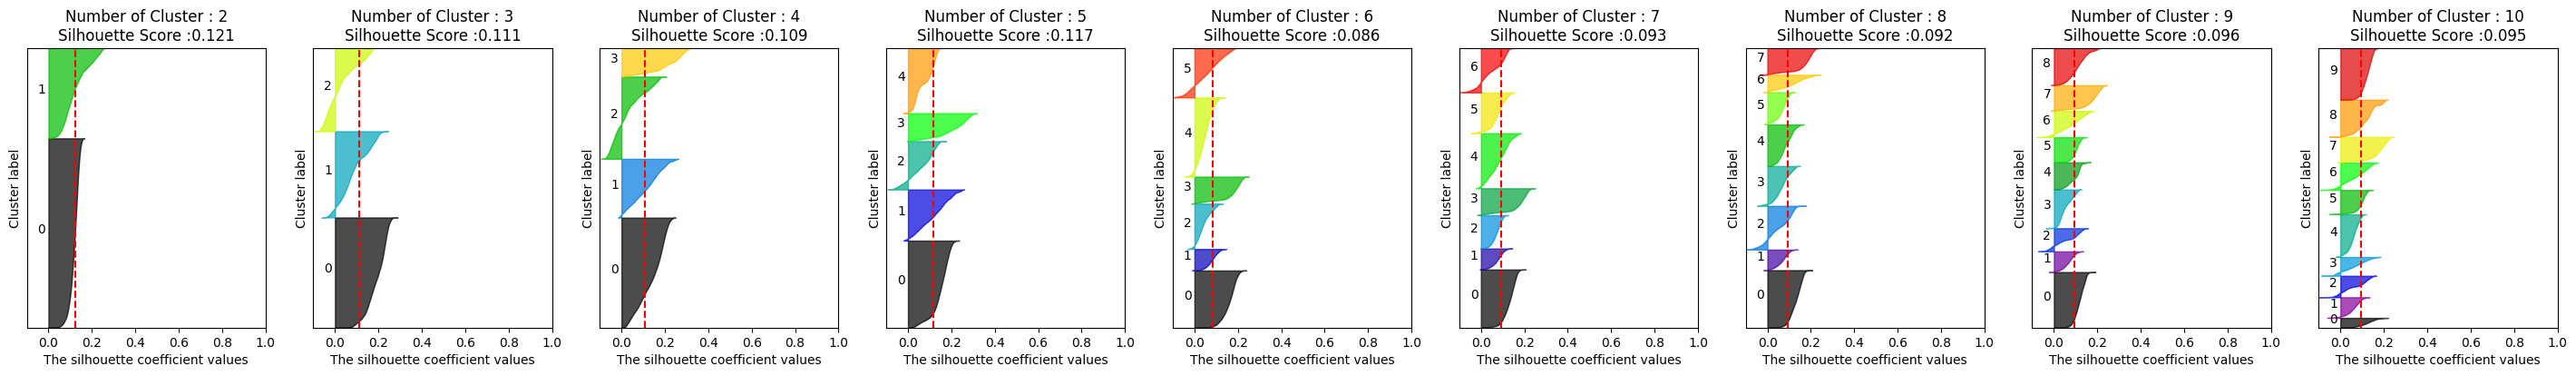

In [291]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8, 9, 10], df_copy)

In [319]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_copy)

In [320]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d = np.argmax(cumsum >= 0.90) + 1
print("dimension : ", d)

[0.1409961  0.26165171 0.35501851 0.42419115 0.47678806 0.51536421
 0.54781746 0.57413667 0.59909311 0.62283464]
dimension :  1


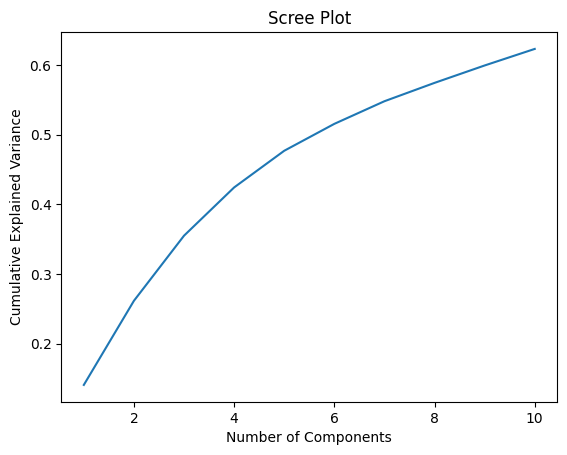

In [321]:
# Display the Scree Plot and label where it hits 0.9 cumulative explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [323]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_copy)

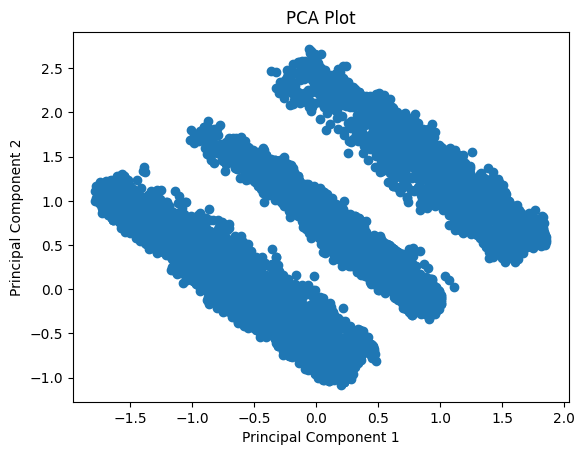

In [324]:
# Plot PCA
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

In [325]:
# Print Loading Scores
print(pca.components_)

[[ 8.08384449e-03  2.26858773e-02  6.82327382e-01  9.54951931e-03
   7.33198221e-03  1.00220218e-02  1.16077668e-02  5.69346504e-03
   1.19075484e-02  1.66436049e-02  9.19586581e-02  9.66182305e-02
   1.15144236e-02 -2.19378231e-03  2.41780973e-04 -2.29881909e-02
   1.35030833e-02  1.35233078e-02  3.78343526e-02  9.69324975e-03
  -8.70642367e-03  3.78013723e-02  1.31511063e-02 -7.76838997e-02
   2.32811362e-02  1.80734948e-02  3.52110964e-02  3.85720663e-02
  -8.37384446e-03 -1.10341691e-02 -2.69991411e-02 -4.25102755e-02
  -8.95259674e-03  3.24584329e-03 -3.37740262e-03 -1.35032322e-02
  -1.77477622e-03 -5.32242905e-03 -8.78509615e-04  6.66815297e-04
   7.71009175e-03 -7.21457520e-03 -1.30983969e-02  1.16842750e-03
  -1.01889769e-03 -6.82935110e-03 -9.77339149e-03 -3.48903882e-02
   1.35328512e-03 -3.76338217e-02 -5.69694796e-02 -4.65466048e-03
   6.79333649e-03  1.98733022e-01 -2.52305014e-02 -2.29960565e-02
  -3.05148059e-02 -1.35433668e-02 -1.08840617e-02  7.23638918e-03
   1.27407

For cluster = 1, SSE/WCSS is 147892.05045148224
For cluster = 2, SSE/WCSS is 129528.68695050338
For cluster = 3, SSE/WCSS is 116344.17430043993
For cluster = 4, SSE/WCSS is 108530.3210074371
For cluster = 5, SSE/WCSS is 100875.45525874716
For cluster = 6, SSE/WCSS is 97632.77411431794
For cluster = 7, SSE/WCSS is 94598.57414075203
For cluster = 8, SSE/WCSS is 92599.33806532952
For cluster = 9, SSE/WCSS is 89844.50649914498
For cluster = 10, SSE/WCSS is 88392.37355952236


Text(0, 0.5, 'WCSS')

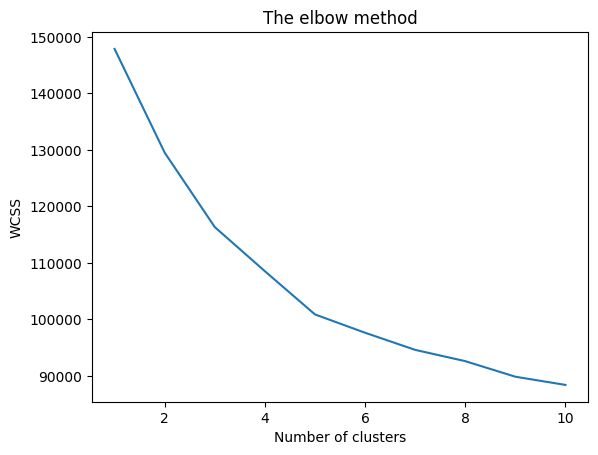

In [317]:
# Use df_pca for K_Means
from sklearn.cluster import KMeans

wcss=[]
sse = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [318]:
from sklearn.metrics import silhouette_score
wcss = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters= k,max_iter=100).fit(df_pca)
  label = kmeans.labels_
  sil_coeff = silhouette_score(df_pca,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

For cluster= 2, Silhouette Coefficient is 0.10508046287456509


KeyboardInterrupt: 

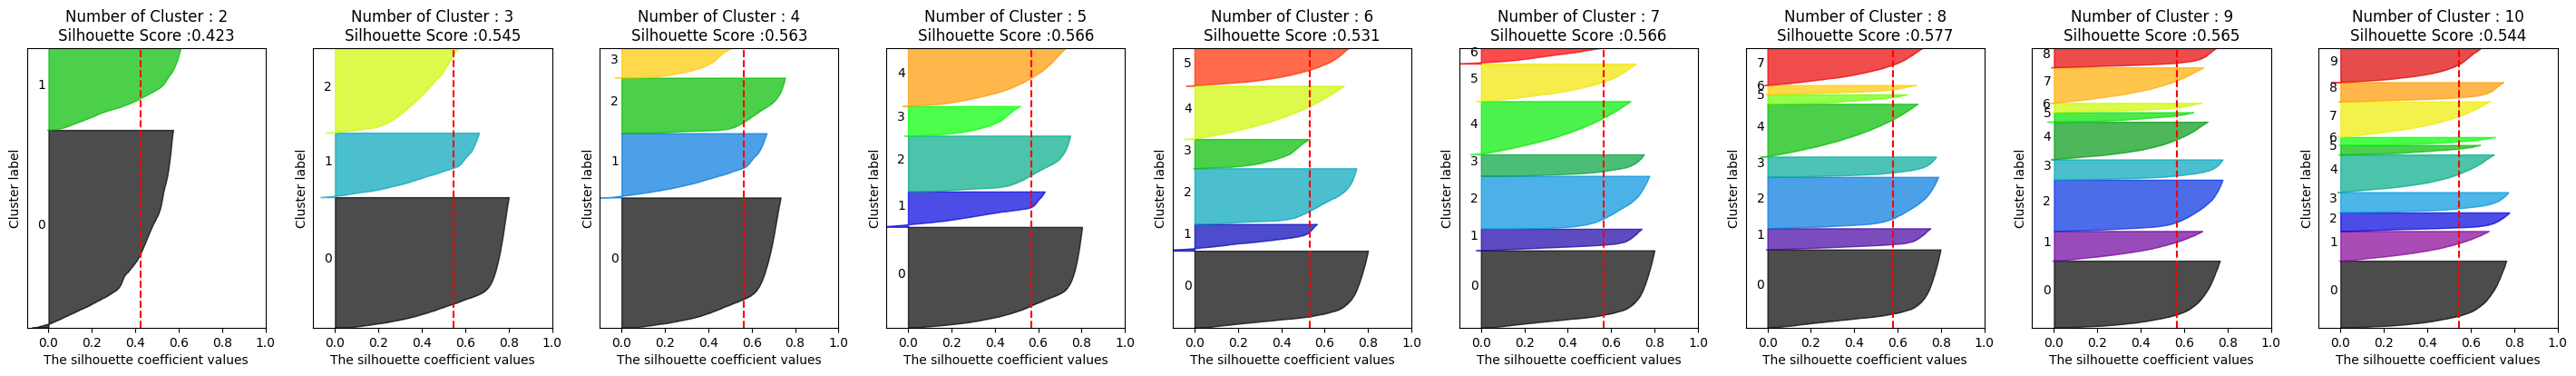

In [299]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8, 9, 10], df_pca)

In [304]:
# Train Kmeans model with 2 Clusters using df_pca
kmeans = KMeans(n_clusters=6, max_iter=100)
kmeans.fit(df_pca)

KMeans(max_iter=100, n_clusters=6)

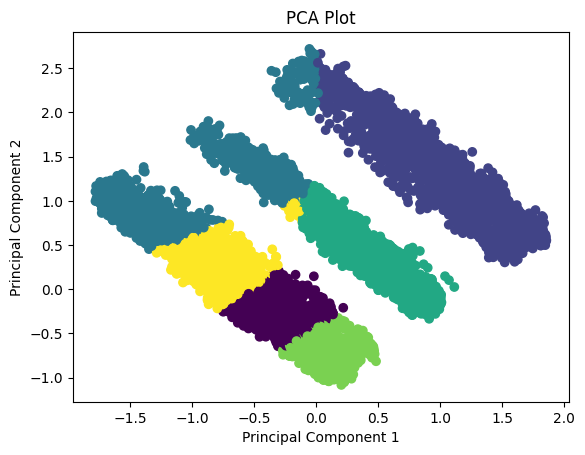

In [305]:
# Plot PCA Model using Generated clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

# Profiling / Describing the Clusters